In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [3]:
df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/tmp/ipykernel_34/4271952552.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [4]:
df['Did you reach out to anyone? (Select all that apply)'] = df['Did you reach out to anyone? (Select all that apply)'].fillna('')
df['Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'] = df['Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'].fillna('')

features_list = [
    "excessive worrying or fear",
    "avoiding social situations and friends",
    "fatigue or sleep problems",
    "use of recreational drugs or alcohol",
    "inability to gauge or interpret other people’s feelings or emotions",
    "intense irritability or anger",
    "obsession with your physical appearance, weight or eating habits",
    "changes in sex drive",
    "problems concentrating, learning or completing everyday tasks",
    'sudden mood changes, going from “lows” to “highs.”',
    "suicidal thoughts or self-injury",
    "too many useless, small  thoughts",
]

legend_list = ['relied on myself', 'friends/family', '(therapist, counselor, psychiatrist)', 'no one', 'self help videos', 'anonym peers']


/tmp/ipykernel_33/25520952.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/tmp/ipykernel_33/25520952.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = value_counts.str.contains(v).sum()
/tmp/ipykernel_33/25520952.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = value_counts.str.contains(v).sum()
/tmp/ipykernel_33/25520952.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = value_counts.str.contains(v).sum()
/tmp/ipykernel_33/25520952.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = val

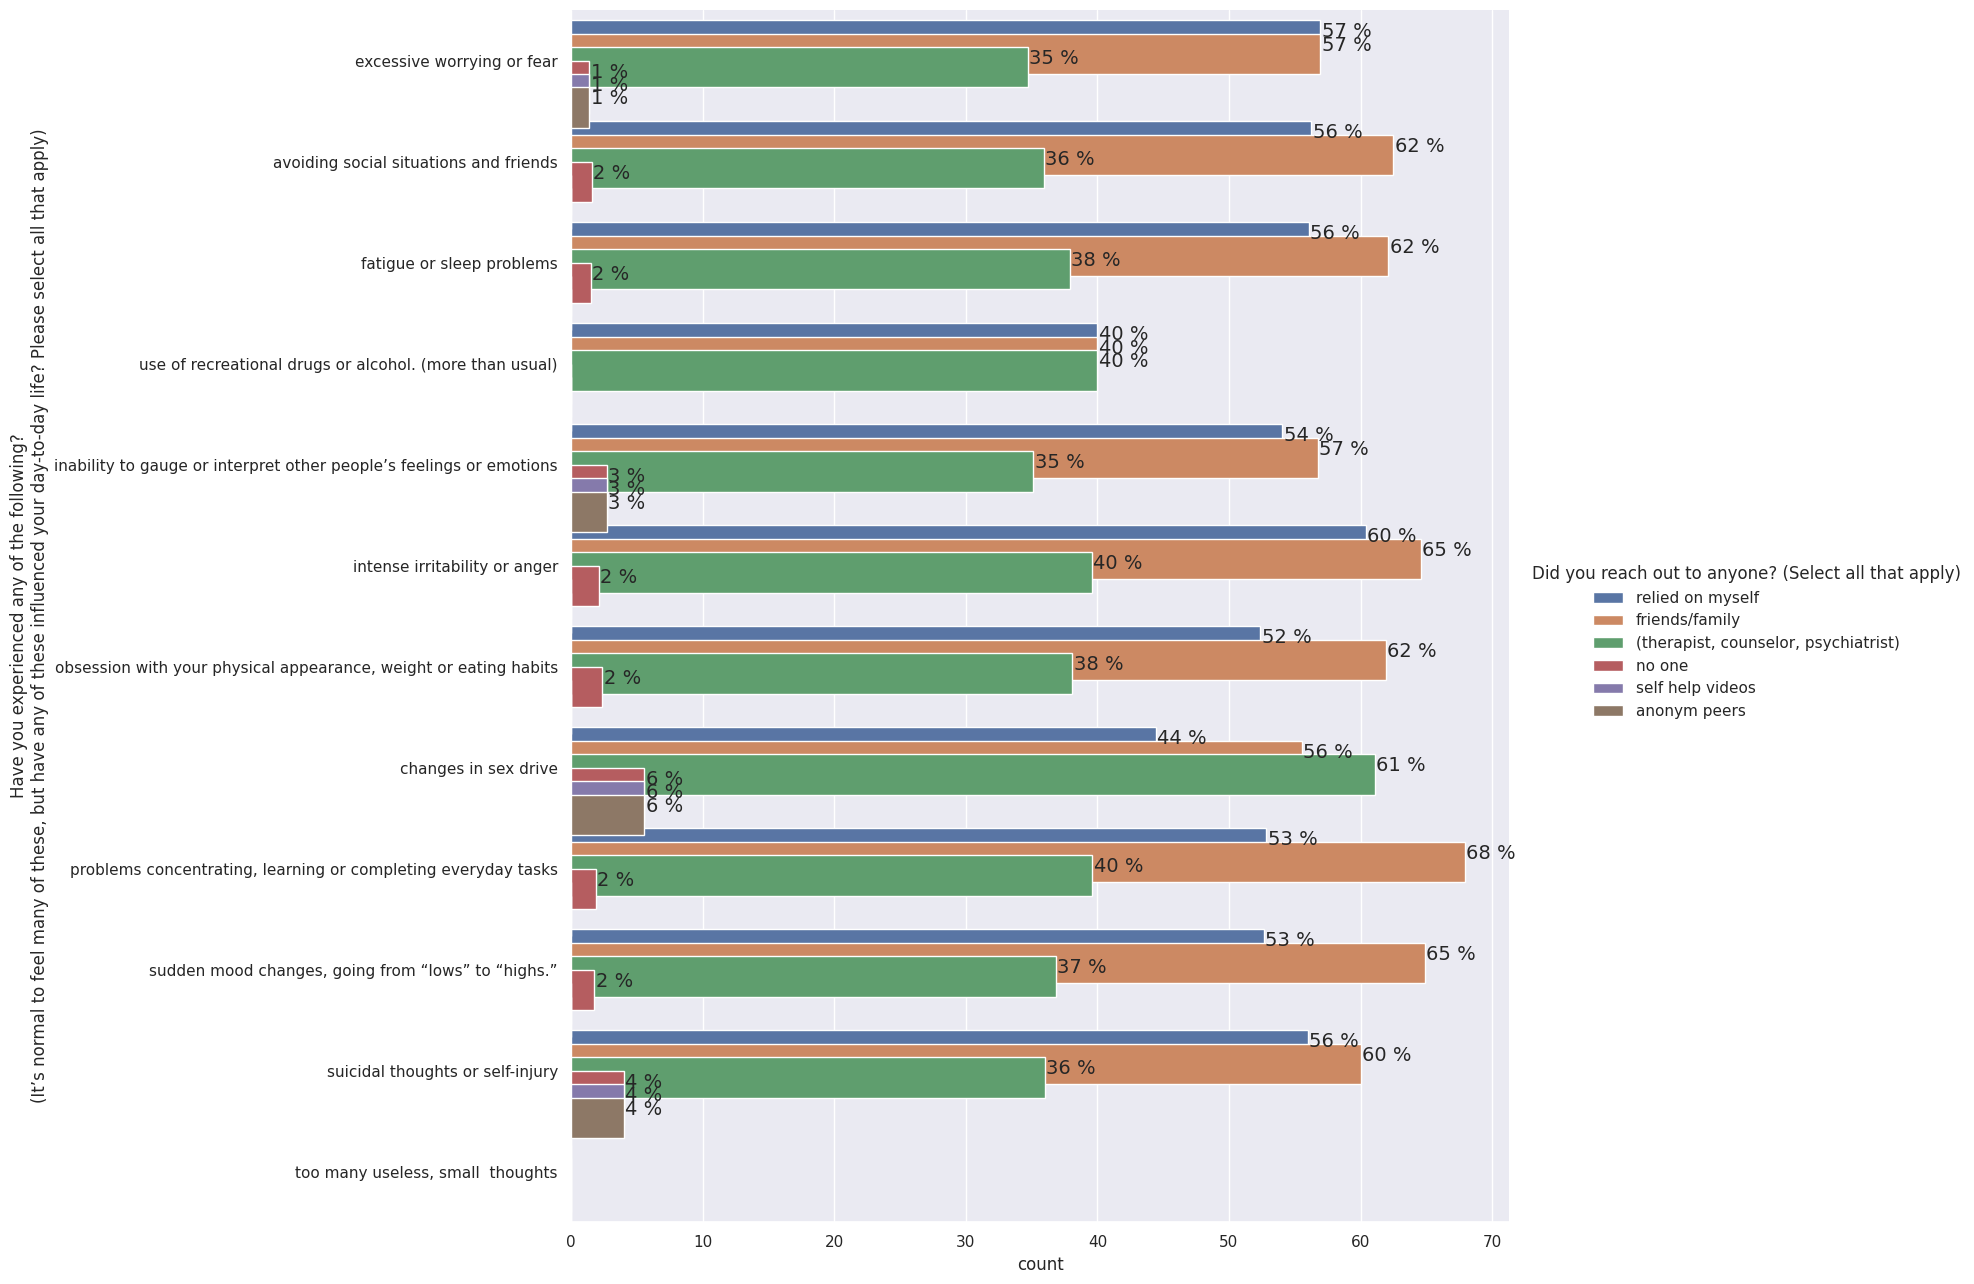

In [34]:

df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


result_df3 = pd.DataFrame(index=features_list, columns=legend_list)
for word in features_list:
    df[word] = df['Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'].str.contains(word, case=False)
    filtered_df = df[df[word]]
    value_counts = filtered_df['Did you reach out to anyone? (Select all that apply)']
    total_count = len(filtered_df)
    for v in legend_list:
        count = value_counts.str.contains(v).sum()
        percentage = (count / total_count) * 100
        result_df3.loc[word, v] = percentage

result_df3 = result_df3.rename(index={'use of recreational drugs or alcohol': 'use of recreational drugs or alcohol. (more than usual)'})
result_df3 = result_df3.reset_index().rename(columns={'index': 'Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'})

long_df2 = result_df3.melt(id_vars='Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)', var_name='Did you reach out to anyone? (Select all that apply)', value_name='count')
sns.set(font_scale=10)
width = 12
height = 8
sns.set(rc = {'figure.figsize':(width, height)})
g = sns.catplot(data=long_df2, y='Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)', x='count', hue='Did you reach out to anyone? (Select all that apply)', kind='bar', height=13, aspect=1.3)

ax = g.ax
bar_width = 0.4  # Adjust this value as needed
for patch in ax.patches:
    current_height = patch.get_height()
    patch.set_height(bar_width)
for p in ax.patches:
    count_text = '{:,.0f} %'.format(p.get_width())
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.1
    y = p.get_y() + bar_width / 3.5  # Use bar_width to align text correctly
    if count_text != '0 %':
        ax.annotate(count_text, (x, y), ha='left', va='center', fontsize=14)

plt.show()

In [13]:
result_df3

Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)  \
0                          excessive worrying or fear                                                                                                                     
1              avoiding social situations and friends                                                                                                                     
2                           fatigue or sleep problems                                                                                                                     
3   use of recreational drugs or alcohol. (more th...                                                                                                                     
4   inability to gauge or interpret other people’s...                                                                                                                     
5                       intense irritability or anger                                                                                                                     
6   obsession with your physical appearance, weigh...                                                                                                                     
7                                changes in sex drive                                                                                                                     
8   problems concentrating, learning or completing...                                                                                                                     
9   sudden mood changes, going from “lows” to “hig...                                                                                                                     
10                   suicidal thoughts or self-injury                                                                                                                     
11                  too many useless, small  thoughts                                                                                                                     

   relied on myself friends/family (therapist, counselor, psychiatrist)  \
0         56.944444      56.944444                            34.722222   
1             56.25           62.5                              35.9375   
2         56.060606      62.121212                            37.878788   
3               NaN            NaN                                  NaN   
4         54.054054      56.756757                            35.135135   
5         60.416667      64.583333                            39.583333   
6         52.380952      61.904762                            38.095238   
7         44.444444      55.555556                            61.111111   
8         52.830189      67.924528                            39.622642   
9         52.631579      64.912281                            36.842105   
10             56.0           60.0                                 36.0   
11              0.0            0.0                                  0.0   

      no one self help videos anonym peers  
0   1.388889         1.388889     1.388889  
1     1.5625              0.0          0.0  
2   1.515152              0.0          0.0  
3        NaN              NaN          NaN  
4   2.702703         2.702703     2.702703  
5   2.083333              0.0          0.0  
6   2.380952              0.0          0.0  
7   5.555556         5.555556     5.555556  
8   1.886792              0.0          0.0  
9   1.754386              0.0          0.0  
10       4.0              4.0          4.0  
11       0.0              0.0          0.0

In [12]:
pd.set_option('display.max_colwidth', 1000)
expr_var = 'Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'
df[df[expr_var].str.contains("use of recreational drugs or alcohol", case=False)][expr_var]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                    use of recreational drugs or alcohol.(more than usual), excessive worrying or fear.
28                                                                                                                                          excessive worrying or fear., fatigue or sleep problems., feelings of sadness or isolation., intense irritability or anger., obsession with your physical appearance, weight or eating habits., problems concentrating, learning or completing everyday tasks., sudden mood changes, going from “lows” to “highs.”, suicidal thought

/tmp/ipykernel_33/666558476.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


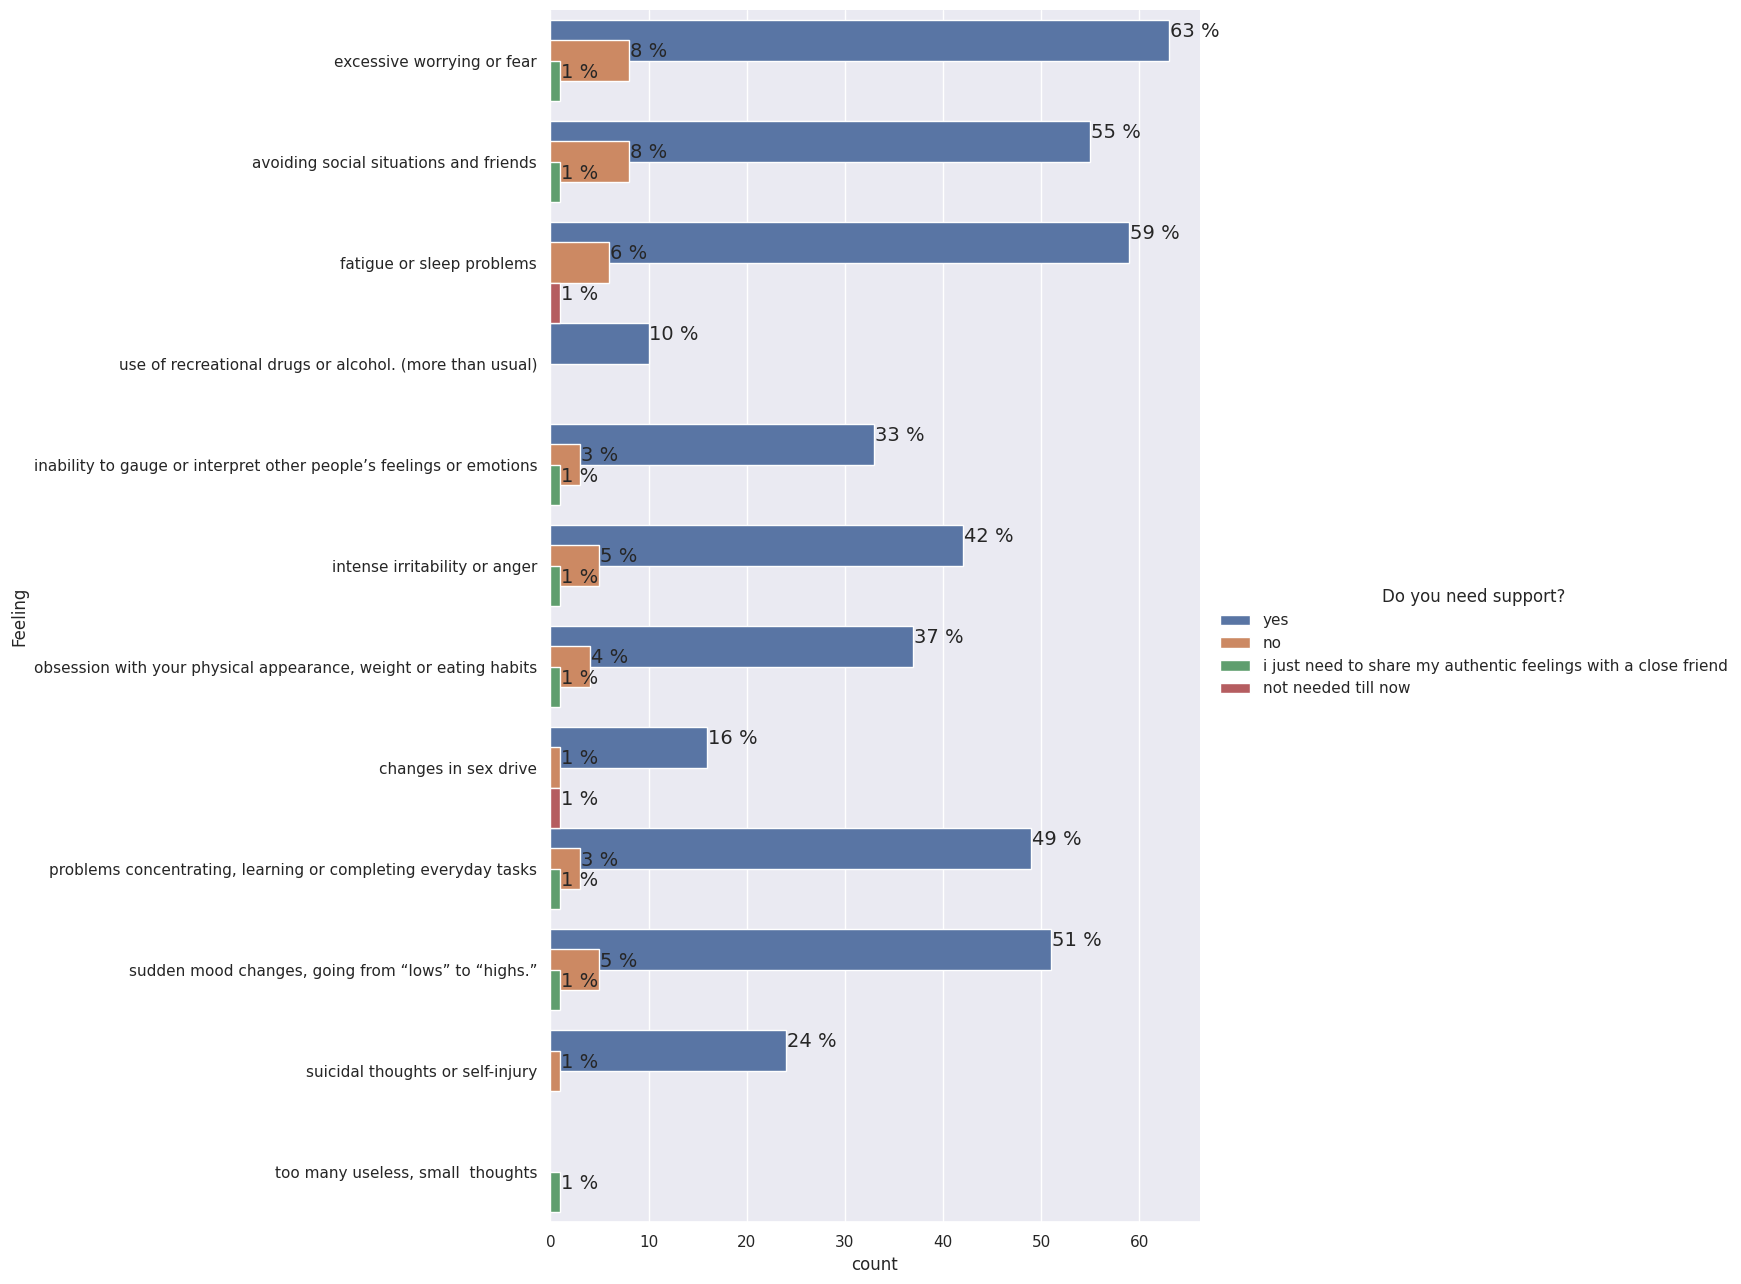

In [23]:



experience_options = [
    "excessive worrying or fear",
    "avoiding social situations and friends",
    "fatigue or sleep problems",
    # "use of recreational drugs or alcohol. (more than usual)",
    "use of recreational drugs or alcohol",
    "inability to gauge or interpret other people’s feelings or emotions",
    "intense irritability or anger",
    "obsession with your physical appearance, weight or eating habits",
    "changes in sex drive",
    "problems concentrating, learning or completing everyday tasks",
    'sudden mood changes, going from “lows” to “highs.”',
    "suicidal thoughts or self-injury",
    "too many useless, small  thoughts",
]
df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
result_df = pd.DataFrame(index=experience_options, columns=['yes', 'no', 'i just need to share my authentic feelings with a close friend', 'not needed till now'])
for word in experience_options:
    # Create a column with True/False based on the presence of the word
    df[word] = df['Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'].str.contains(word, case=False)

    # Filter the DataFrame for rows where 'contains_word' is True
    filtered_df = df[df[word]]

    # Count the occurrences of each unique value in the 'unique_column'
    value_counts = filtered_df['Based on how you typically feel in your day-to-day life, are there moments when you feel you might need support?'].value_counts()

    # Add the counts to the results DataFrame with the word as the index
    # results[word] = value_counts
    for unique_value in value_counts.index:
        result_df.loc[word, unique_value] = value_counts[unique_value]

# Transpose the results DataFrame for better readability
# results = results.T
result_df = result_df.rename(index={'use of recreational drugs or alcohol': 'use of recreational drugs or alcohol. (more than usual)'})
result_df = result_df.reset_index().rename(columns={'index': 'Feeling'})

# Melt the DataFrame to long format
long_df = result_df.melt(id_vars='Feeling', var_name='Do you need support?', value_name='count')
sns.set(font_scale=14)
width = 12
height = 8
sns.set(rc = {'figure.figsize':(width, height)})
g = sns.catplot(data=long_df, y='Feeling', x='count', hue='Do you need support?', kind='bar', height=13, aspect=1.1)
ax = g.ax
bar_width = 0.4  # Adjust this value as needed
for patch in ax.patches:
    current_height = patch.get_height()
    patch.set_height(bar_width)
for p in ax.patches:
    count_text = '{:,.0f} %'.format(p.get_width())
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.1
    y = p.get_y() + bar_width / 3.5  # Use bar_width to align text correctly
    if count_text != '0 %':
        ax.annotate(count_text, (x, y), ha='left', va='center', fontsize=14)

plt.show()

In [27]:
# How do platform preferences vary by age, gender, or other demographics?
def get_cross_attributes_graph_1(features_list, legend_list, feature_attribute_name, legend_name):
    df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    df[feature_attribute_name] = df[feature_attribute_name].fillna('')
    df[legend_name] = df[legend_name].fillna('')

    result_df3 = pd.DataFrame(index=features_list, columns=legend_list)
    for word in features_list:
        df[word] = df[feature_attribute_name].str.contains(word, case=False)
        filtered_df = df[df[word]]
        value_counts = filtered_df[legend_name].value_counts()
        for unique_value in value_counts.index:
            result_df3.loc[word, unique_value] = value_counts[unique_value]
    result_df3 = result_df3.rename(index={'use of recreational drugs or alcohol': 'use of recreational drugs or alcohol. (more than usual)'})
    result_df3 = result_df3.reset_index().rename(columns={'index': feature_attribute_name})
    long_df2 = result_df3.melt(id_vars=feature_attribute_name, var_name=legend_name, value_name='count')
    sns.set(font_scale=10)
    width = 12
    height = 8
    sns.set(rc = {'figure.figsize':(width, height)})
    g = sns.catplot(data=long_df2, y=feature_attribute_name, x='count', hue=legend_name, kind='bar', height=13, aspect=1.3)
    ax = g.ax
    bar_width = 0.4  # Adjust this value as needed
    for patch in ax.patches:
        current_height = patch.get_height()
        patch.set_height(bar_width)
    for p in ax.patches:
        count_text = '{:,.0f} %'.format(p.get_width())
        width, height = p.get_width(), p.get_height()
        x = p.get_x() + width + 0.1
        y = p.get_y() + bar_width / 3.5  # Use bar_width to align text correctly
        if count_text != '0 %':
            ax.annotate(count_text, (x, y), ha='left', va='center', fontsize=14)
    plt.show()

/tmp/ipykernel_33/3840389434.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


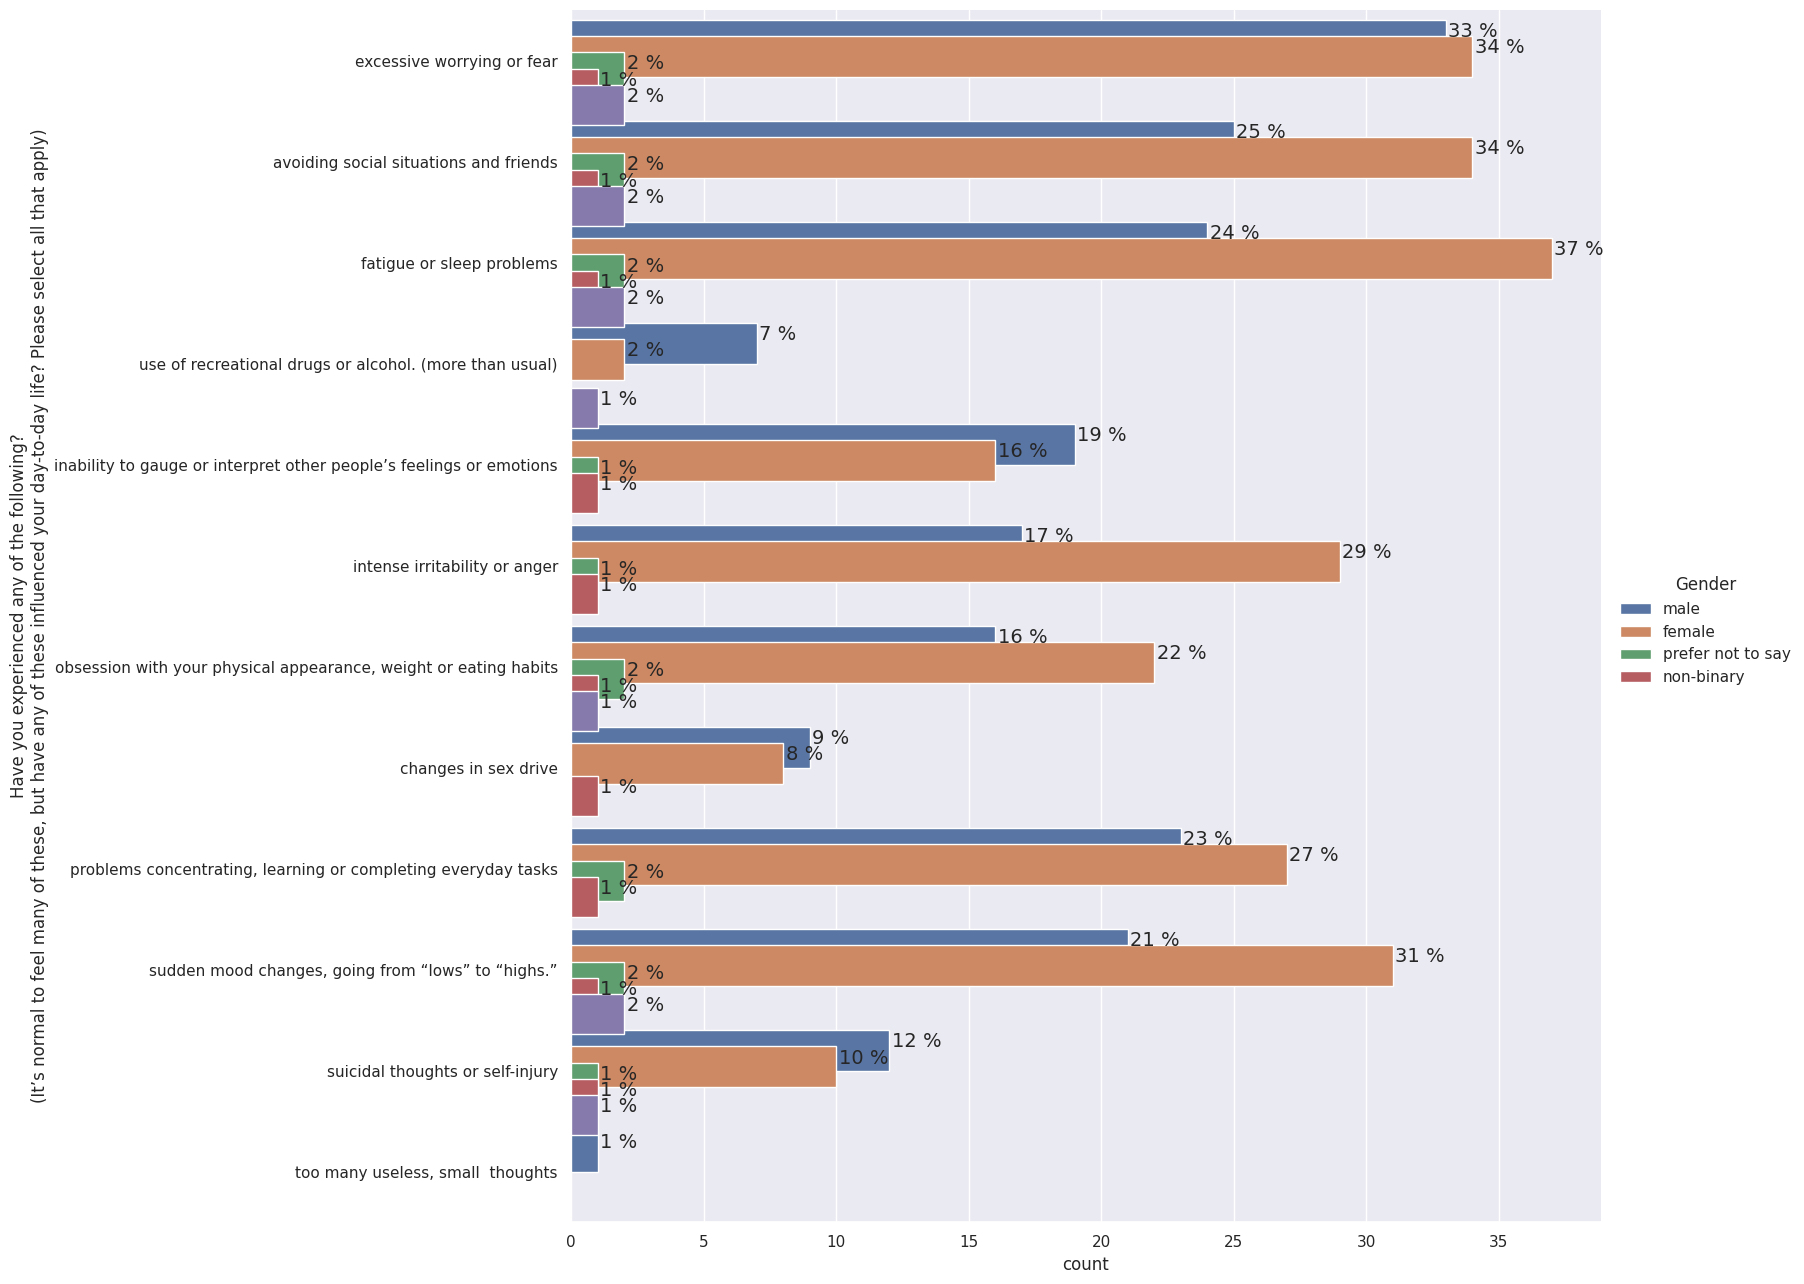

In [28]:
df['Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'].fillna('')
features_list = [
    "excessive worrying or fear",
    "avoiding social situations and friends",
    "fatigue or sleep problems",
    "use of recreational drugs or alcohol",
    "inability to gauge or interpret other people’s feelings or emotions",
    "intense irritability or anger",
    "obsession with your physical appearance, weight or eating habits",
    "changes in sex drive",
    "problems concentrating, learning or completing everyday tasks",
    'sudden mood changes, going from “lows” to “highs.”',
    "suicidal thoughts or self-injury",
    "too many useless, small  thoughts",
]
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
feature_attribute_name = 'Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'
legend_name = 'Gender'
get_cross_attributes_graph_1(features_list, legend_list, feature_attribute_name, legend_name)

/tmp/ipykernel_33/2197655811.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


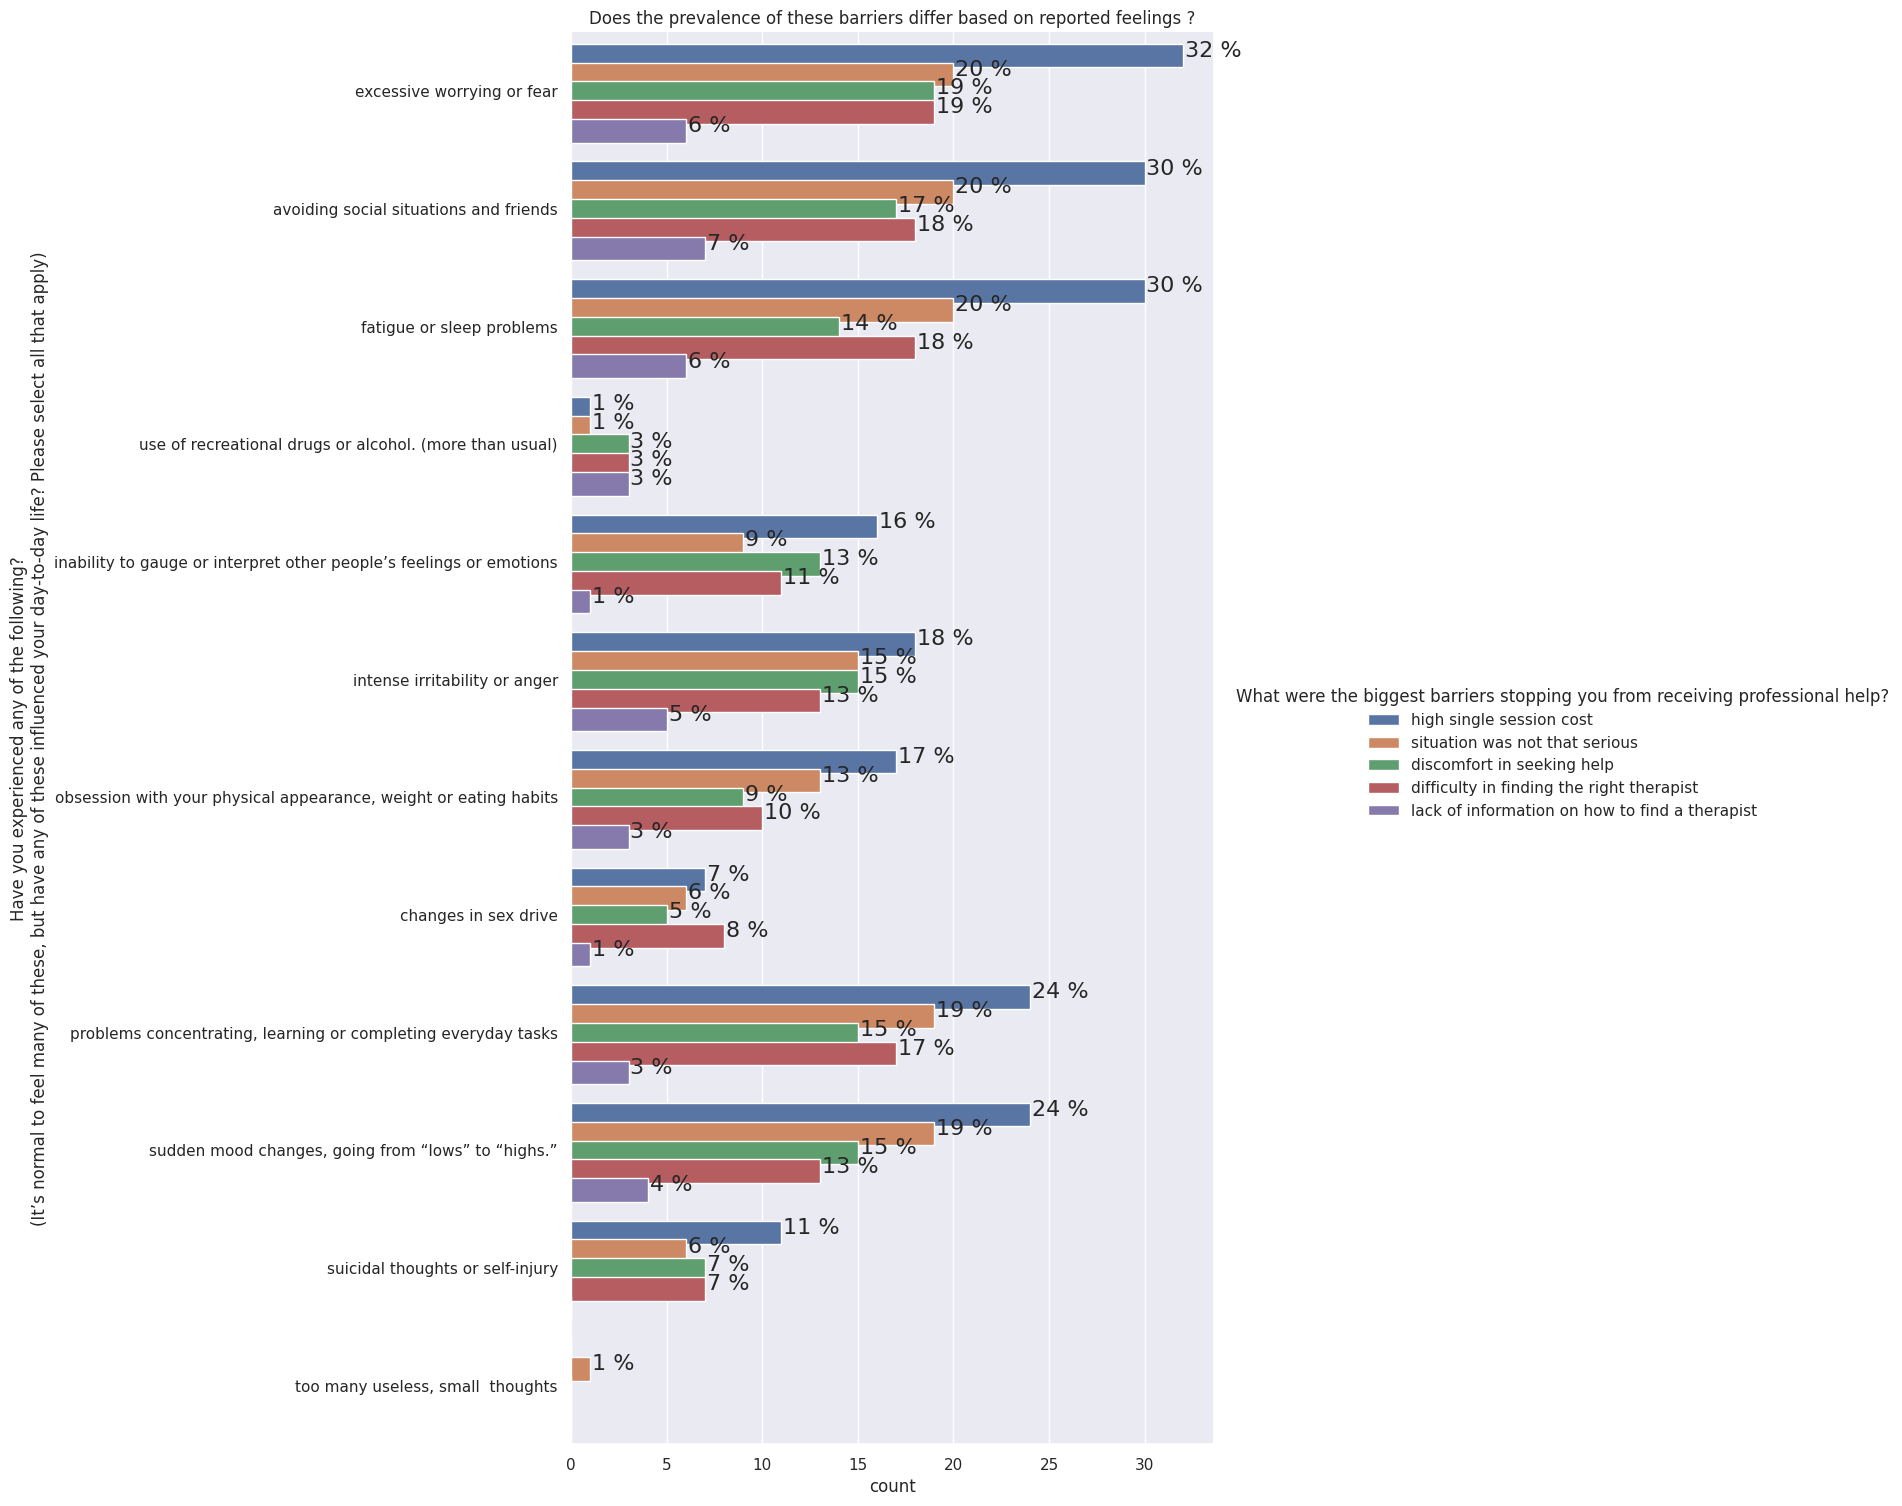

In [32]:
df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df['What were the biggest barriers stopping you from receiving professional help?'] = df['What were the biggest barriers stopping you from receiving professional help?'].fillna('')
df['Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'] = df['Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'].fillna('')
df['What were the biggest barriers stopping you from receiving professional help?'] = df['What were the biggest barriers stopping you from receiving professional help?'].str.replace('/', 'or', regex=True)
df['What were the biggest barriers stopping you from receiving professional help?'] = df['What were the biggest barriers stopping you from receiving professional help?'].str.replace('-', ' ', regex=True)

features_list = [
    "excessive worrying or fear",
    "avoiding social situations and friends",
    "fatigue or sleep problems",
    "use of recreational drugs or alcohol",
    "inability to gauge or interpret other people’s feelings or emotions",
    "intense irritability or anger",
    "obsession with your physical appearance, weight or eating habits",
    "changes in sex drive",
    "problems concentrating, learning or completing everyday tasks",
    'sudden mood changes, going from “lows” to “highs.”',
    "suicidal thoughts or self-injury",
    "too many useless, small  thoughts",
]

legend_list = ['high single session cost',
                 'situation was not that serious',
                 'discomfort in seeking help',
                 'difficulty in finding the right therapist',
                 'lack of information on how to find a therapist']



result_df_4 = pd.DataFrame(index=features_list, columns=legend_list)

for word in features_list:
    # Create a column with True/False based on the presence of the word
    df[word] = df['Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'].str.contains(word, case=False)

    # Filter the DataFrame for rows where 'contains_word' is True
    filtered_df = df[df[word]]

    # Count the occurrences of each unique value in the 'unique_column'
    value_counts = filtered_df['What were the biggest barriers stopping you from receiving professional help?']

    # Add the counts to the results DataFrame with the word as the index
    for v in legend_list:
        result_df_4.loc[word, v] = value_counts.str.contains(v).sum()
result_df_4 = result_df_4.rename(index={'use of recreational drugs or alcohol': 'use of recreational drugs or alcohol. (more than usual)'})
result_df_4 = result_df_4.reset_index().rename(columns={'index': 'Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'})

# Melt the DataFrame to long format
long_df_4 = result_df_4.melt(id_vars='Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)', var_name='What were the biggest barriers stopping you from receiving professional help?', value_name='count')
sns.set(font_scale=10)
width = 12
height = 8
sns.set(rc = {'figure.figsize':(width, height)})
g = sns.catplot(data=long_df_4, y='Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)', x='count', hue='What were the biggest barriers stopping you from receiving professional help?', kind='bar', height=15, aspect=1.0)
ax = g.ax
bar_width = 0.2
for patch in ax.patches:
    current_height = patch.get_height()
    patch.set_height(bar_width)
for p in ax.patches:
    count_text = '{:,.0f} %'.format(p.get_width())
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.1
    y = p.get_y() + bar_width / 3.5  # Use bar_width to align text correctly
    if count_text != '0 %':
        ax.annotate(count_text, (x, y), ha='left', va='center', fontsize=16)
# Display the plot
plt.title('Does the prevalence of these barriers differ based on reported feelings ?')
plt.show()



/tmp/ipykernel_33/3592842942.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/tmp/ipykernel_33/3592842942.py:46: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  result_df_new.loc[word, v] = value_counts.str.contains(v).sum()
/tmp/ipykernel_33/3592842942.py:46: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  result_df_new.loc[word, v] = value_counts.str.contains(v).sum()
/tmp/ipykernel_33/3592842942.py:46: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  result_df_new.loc[word, v] = value_counts.str.contains(v).sum()
/tmp/ipykernel_33/3592842942.py:46: UserWarning: This pattern is interpreted as a regular expression, and has

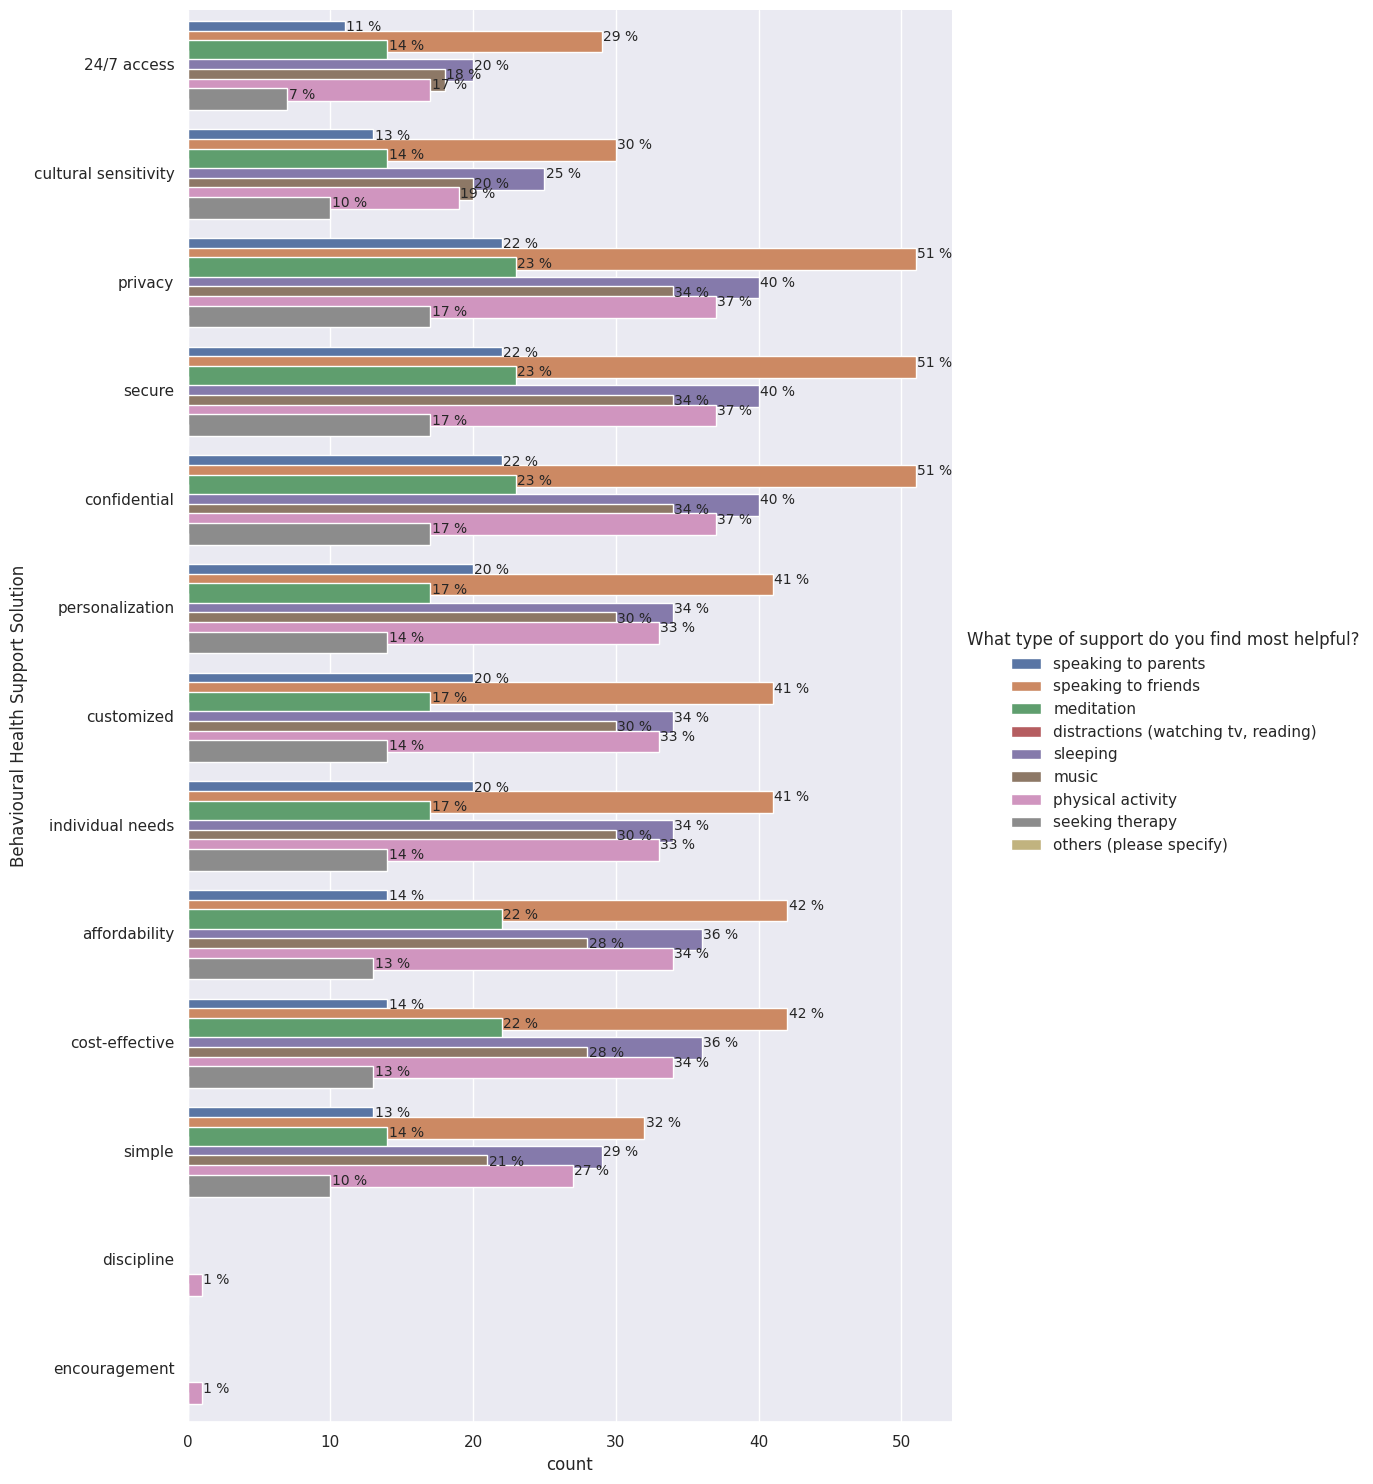

In [5]:
df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df['What are some things that matter to you in a behavioural health support solution?'] = df['What are some things that matter to you in a behavioural health support solution?'].fillna('')
behavioural_health_support_solution = [
    '24/7 access',
    'cultural sensitivity',
    'privacy',
    'secure',
    'confidential',
    'personalization',
    'customized',
    'individual needs',
    'affordability',
    'cost-effective',
    'simple',
    'discipline',
    'encouragement'
]

most_helpful = ['speaking to parents', 'speaking to friends','meditation','distractions (watching tv, reading)',
                                                                             'sleeping',
                                                                             'music',
                                                                             'physical activity',
                                                                             'seeking therapy',
                                                                             'others (please specify)']



result_df_new = pd.DataFrame(index=behavioural_health_support_solution, columns=[
                                                                             'speaking to parents',
                                                                             'speaking to friends',
                                                                             'meditation',
                                                                             'distractions (watching tv, reading)',
                                                                             'sleeping',
                                                                             'music',
                                                                             'physical activity',
                                                                             'seeking therapy',
                                                                             'others (please specify)'
                                                                             ])

for word in behavioural_health_support_solution:
    df[word] = df['What are some things that matter to you in a behavioural health support solution?'].str.contains(word, case=False)
    filtered_df = df[df[word]]
    value_counts = filtered_df['In times of emotional distress, what type of support do you find most helpful? (select all that apply)']
    for v in most_helpful:
        result_df_new.loc[word, v] = value_counts.str.contains(v).sum()

result_df_new = result_df_new.reset_index().rename(columns={'index': 'Behavioural Health Support Solution'})
long_df = result_df_new.melt(id_vars='Behavioural Health Support Solution', var_name='What type of support do you find most helpful?', value_name='count')
sns.set(font_scale=10)
width = 12
height = 8
sns.set(rc = {'figure.figsize':(width, height)})
g = sns.catplot(data=long_df, y='Behavioural Health Support Solution', x='count', hue='What type of support do you find most helpful?', kind='bar', height=15, aspect=0.7)
ax = g.ax
bar_width = 0.2
for patch in ax.patches:
    current_height = patch.get_height()
    patch.set_height(bar_width)
for p in ax.patches:
    count_text = '{:,.0f} %'.format(p.get_width())
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.1
    y = p.get_y() + bar_width / 3.5  # Use bar_width to align text correctly
    if count_text != '0 %':
        ax.annotate(count_text, (x, y), ha='left', va='center', fontsize=10)
plt.show()



/tmp/ipykernel_33/417428498.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/tmp/ipykernel_33/417428498.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[word] = df['Did you reach out to anyone? (Select all that apply)'].str.contains(word, case=False)


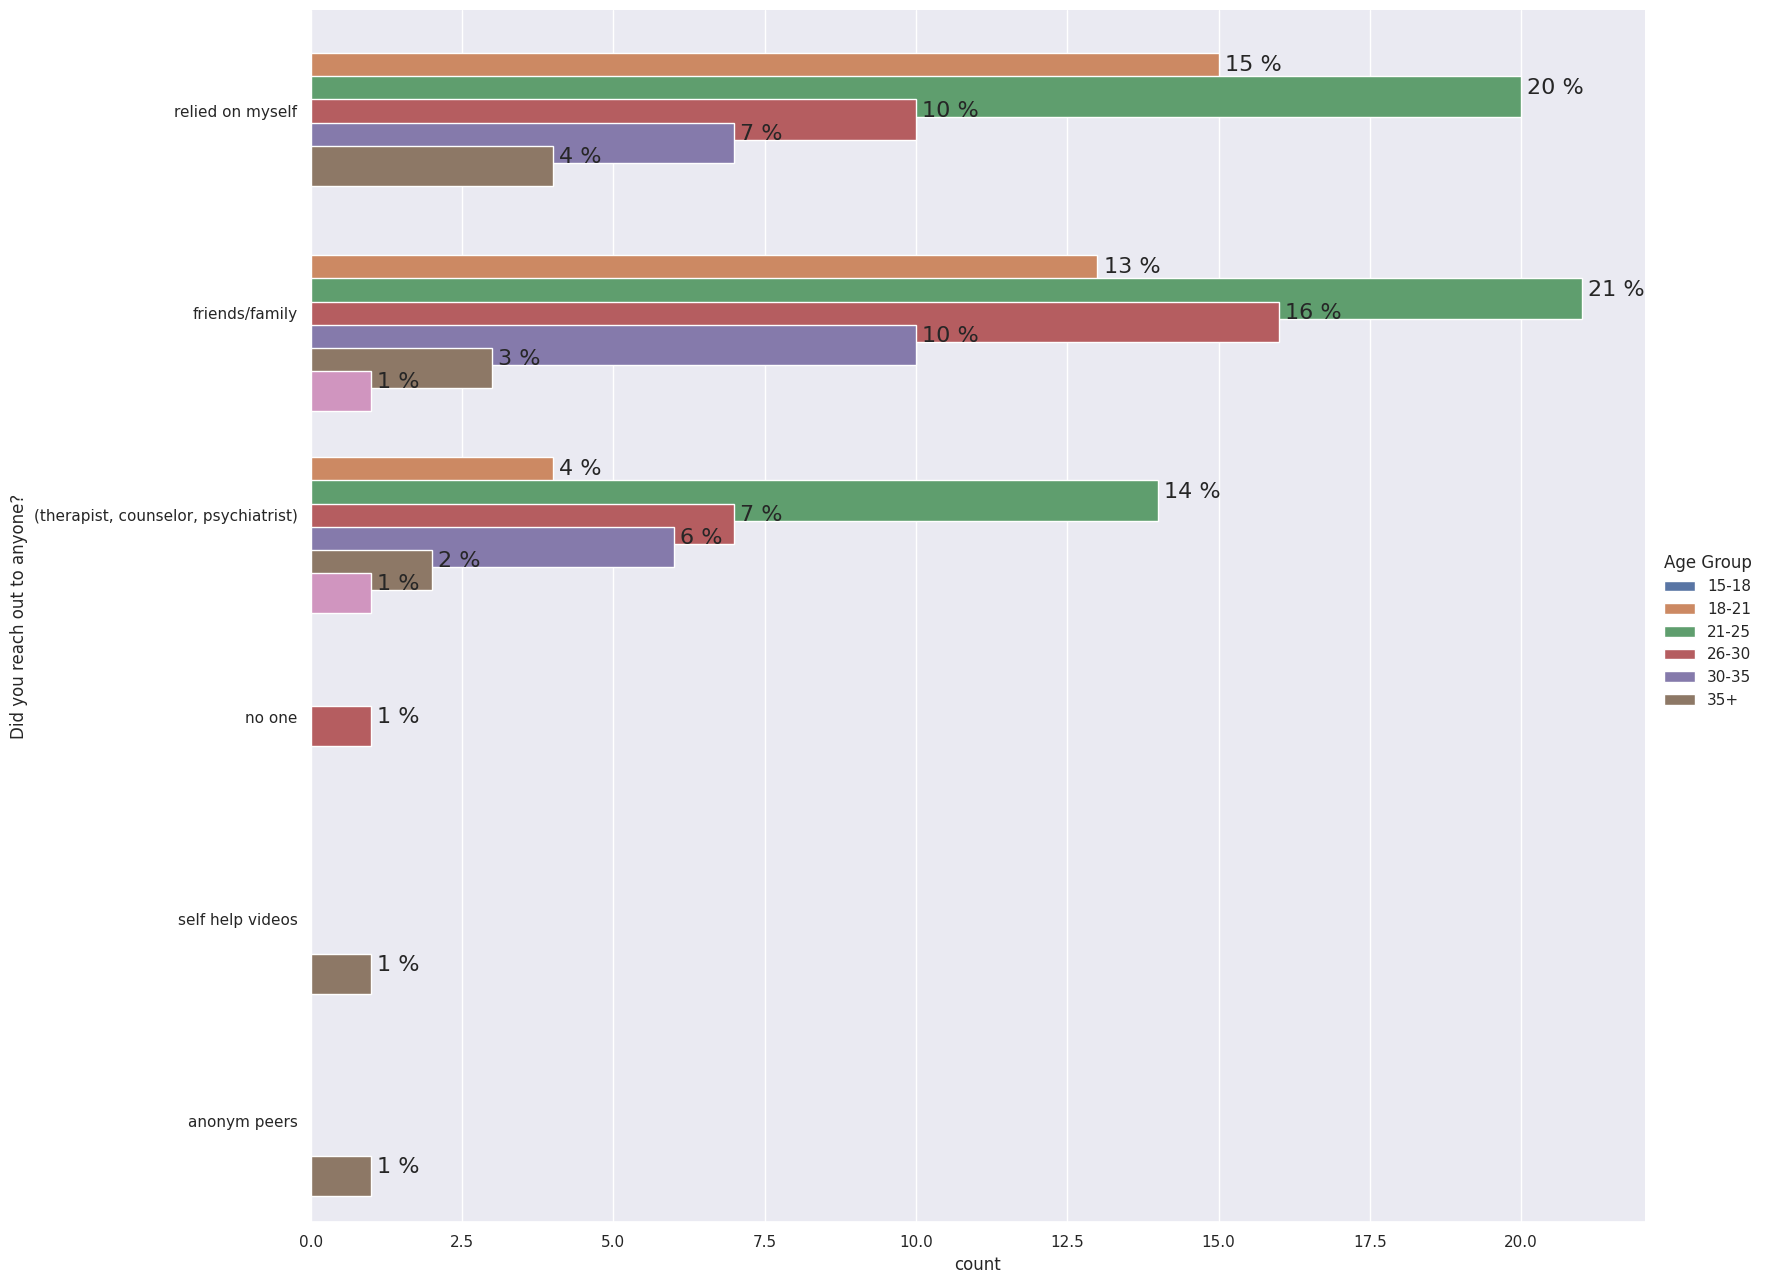

In [7]:
coping_mechanisms = ['relied on myself', 'friends/family', '(therapist, counselor, psychiatrist)', 'no one', 'self help videos', 'anonym peers']

df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df['Did you reach out to anyone? (Select all that apply)'] = df['Did you reach out to anyone? (Select all that apply)'].fillna('')
df['Age Group'] = df['Age Group'].fillna('')

result_df3 = pd.DataFrame(index=coping_mechanisms, columns=['15-18', '18-21', '21-25', '26-30', '30-35', '35+'])
for word in coping_mechanisms:
    df[word] = df['Did you reach out to anyone? (Select all that apply)'].str.contains(word, case=False)
    filtered_df = df[df[word]]
    value_counts = filtered_df['Age Group'].value_counts()
    for unique_value in value_counts.index:
        result_df3.loc[word, unique_value] = value_counts[unique_value]

# Transpose the results DataFrame for better readability
# results = results.T
result_df3 = result_df3.reset_index().rename(columns={'index': 'Did you reach out to anyone?'})

# Melt the DataFrame to long format
long_df2 = result_df3.melt(id_vars='Did you reach out to anyone?', var_name='Age Group', value_name='count')
sns.set(font_scale=10)
width = 12
height = 8
sns.set(rc = {'figure.figsize':(width, height)})
g = sns.catplot(data=long_df2, y='Did you reach out to anyone?', x='count', hue='Age Group', kind='bar', height=13, aspect=1.3)
ax = g.ax
bar_width = 0.2
for patch in ax.patches:
    current_height = patch.get_height()
    patch.set_height(bar_width)
for p in ax.patches:
    count_text = '{:,.0f} %'.format(p.get_width())
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.1
    y = p.get_y() + bar_width / 3.5  # Use bar_width to align text correctly
    if count_text != '0 %':
        ax.annotate(count_text, (x, y), ha='left', va='center', fontsize=16)

plt.show()



/tmp/ipykernel_33/2437721769.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


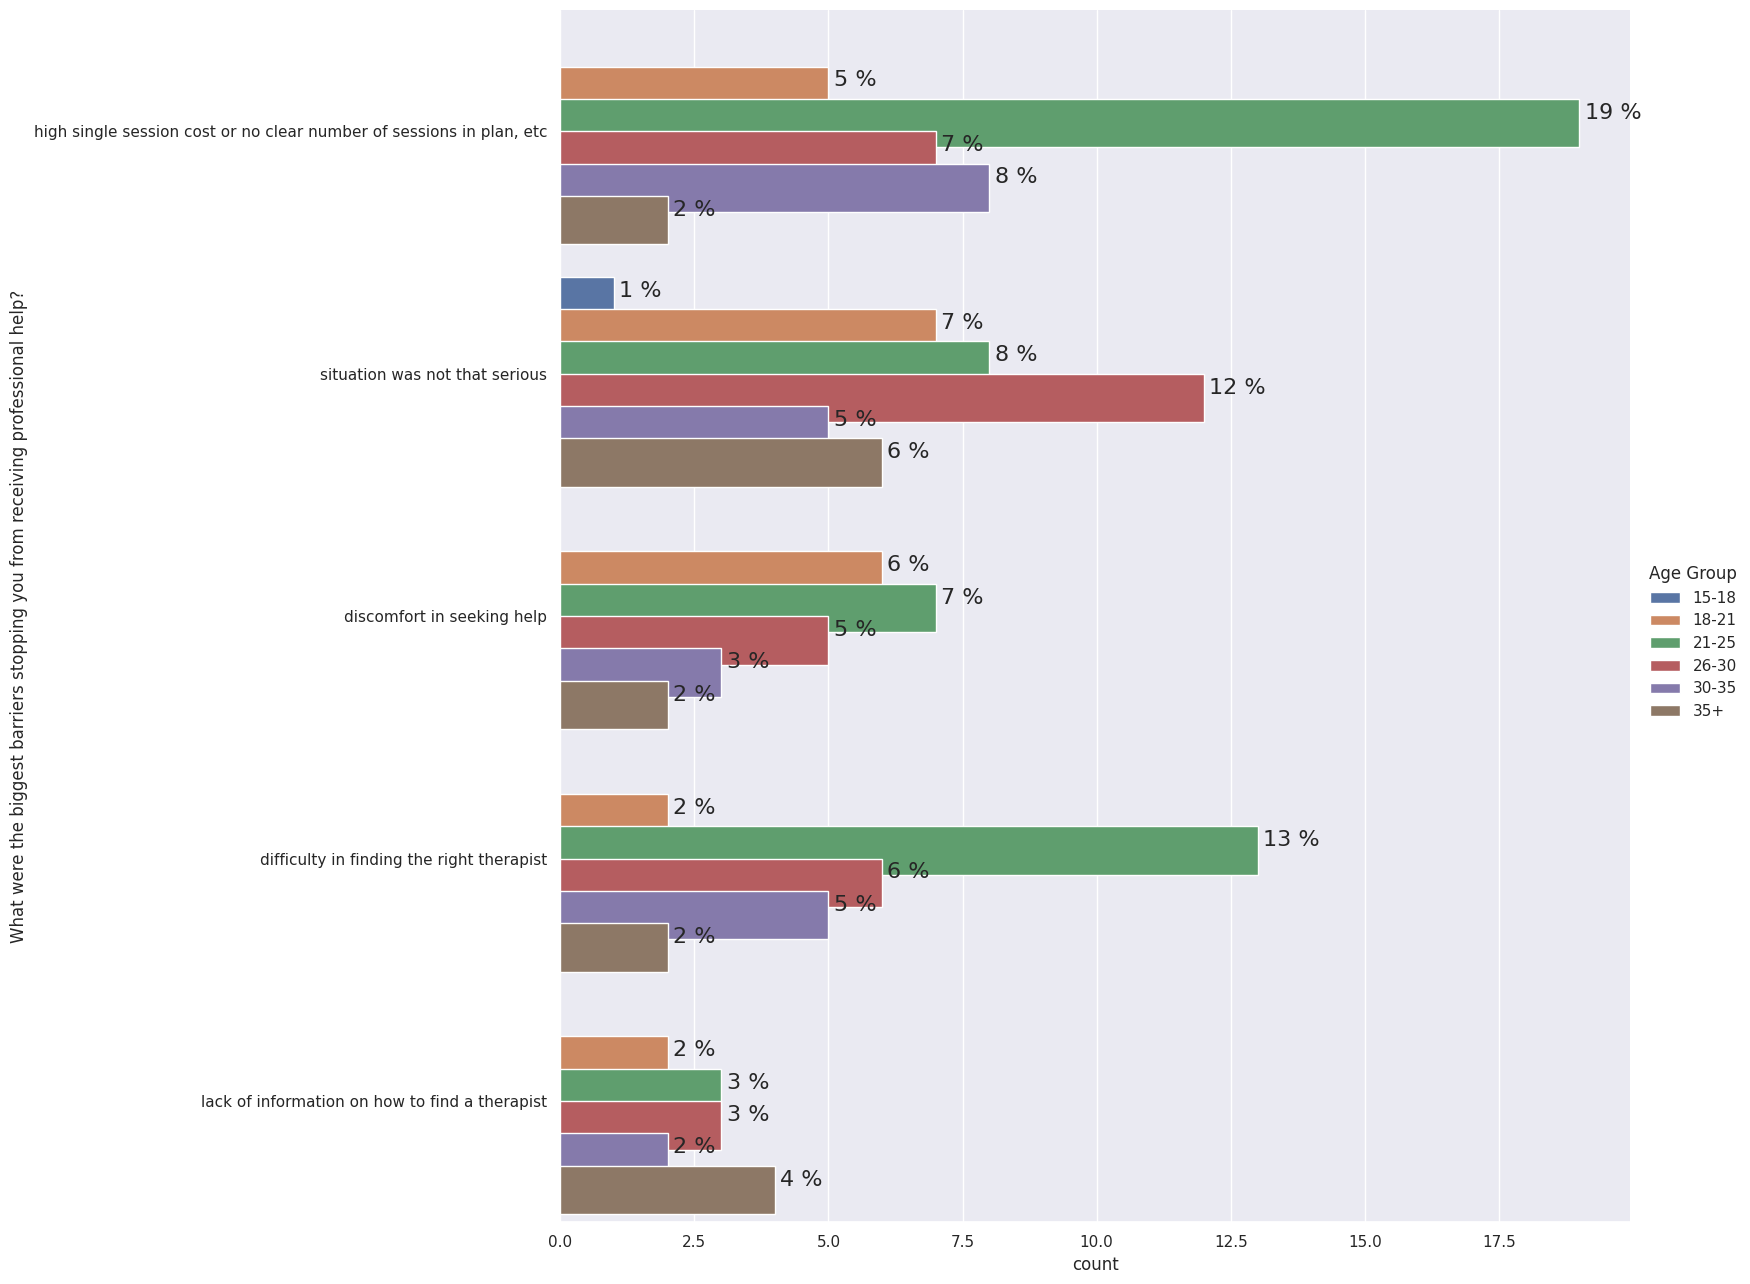

In [9]:
def get_cross_attributes_graph(features_list, legend_list, feature_attribute_name, legend_name):
    df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    df[feature_attribute_name] = df[feature_attribute_name].fillna('')
    df[legend_name] = df[legend_name].fillna('')

    result_df3 = pd.DataFrame(index=features_list, columns=legend_list)
    for word in features_list:
        df[word] = df[feature_attribute_name].str.contains(word, case=False)
        filtered_df = df[df[word]]
        value_counts = filtered_df[legend_name].value_counts()
        for unique_value in value_counts.index:
            result_df3.loc[word, unique_value] = value_counts[unique_value]
    result_df3 = result_df3.rename(index={'high single session cost': 'high single session cost or no clear number of sessions in plan, etc'})
    result_df3 = result_df3.reset_index().rename(columns={'index': feature_attribute_name})
    long_df2 = result_df3.melt(id_vars=feature_attribute_name, var_name=legend_name, value_name='count')
    sns.set(font_scale=10)
    width = 12
    height = 8
    sns.set(rc = {'figure.figsize':(width, height)})
    g = sns.catplot(data=long_df2, y=feature_attribute_name, x='count', hue=legend_name, kind='bar', height=13, aspect=1.3)
    ax = g.ax
    bar_width = 0.2
    for patch in ax.patches:
        current_height = patch.get_height()
        patch.set_height(bar_width)
    for p in ax.patches:
        count_text = '{:,.0f} %'.format(p.get_width())
        width, height = p.get_width(), p.get_height()
        x = p.get_x() + width + 0.1
        y = p.get_y() + bar_width / 3.5  # Use bar_width to align text correctly
        if count_text != '0 %':
            ax.annotate(count_text, (x, y), ha='left', va='center', fontsize=16)
    plt.show()
features_list = ['high single session cost',
                 'situation was not that serious',
                 'discomfort in seeking help',
                 'difficulty in finding the right therapist',
                 'lack of information on how to find a therapist']
legend_list = ['15-18', '18-21', '21-25', '26-30', '30-35', '35+']
feature_attribute_name = 'What were the biggest barriers stopping you from receiving professional help?'
legend_name = 'Age Group'
get_cross_attributes_graph(features_list, legend_list, feature_attribute_name, legend_name)

/tmp/ipykernel_33/20477111.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


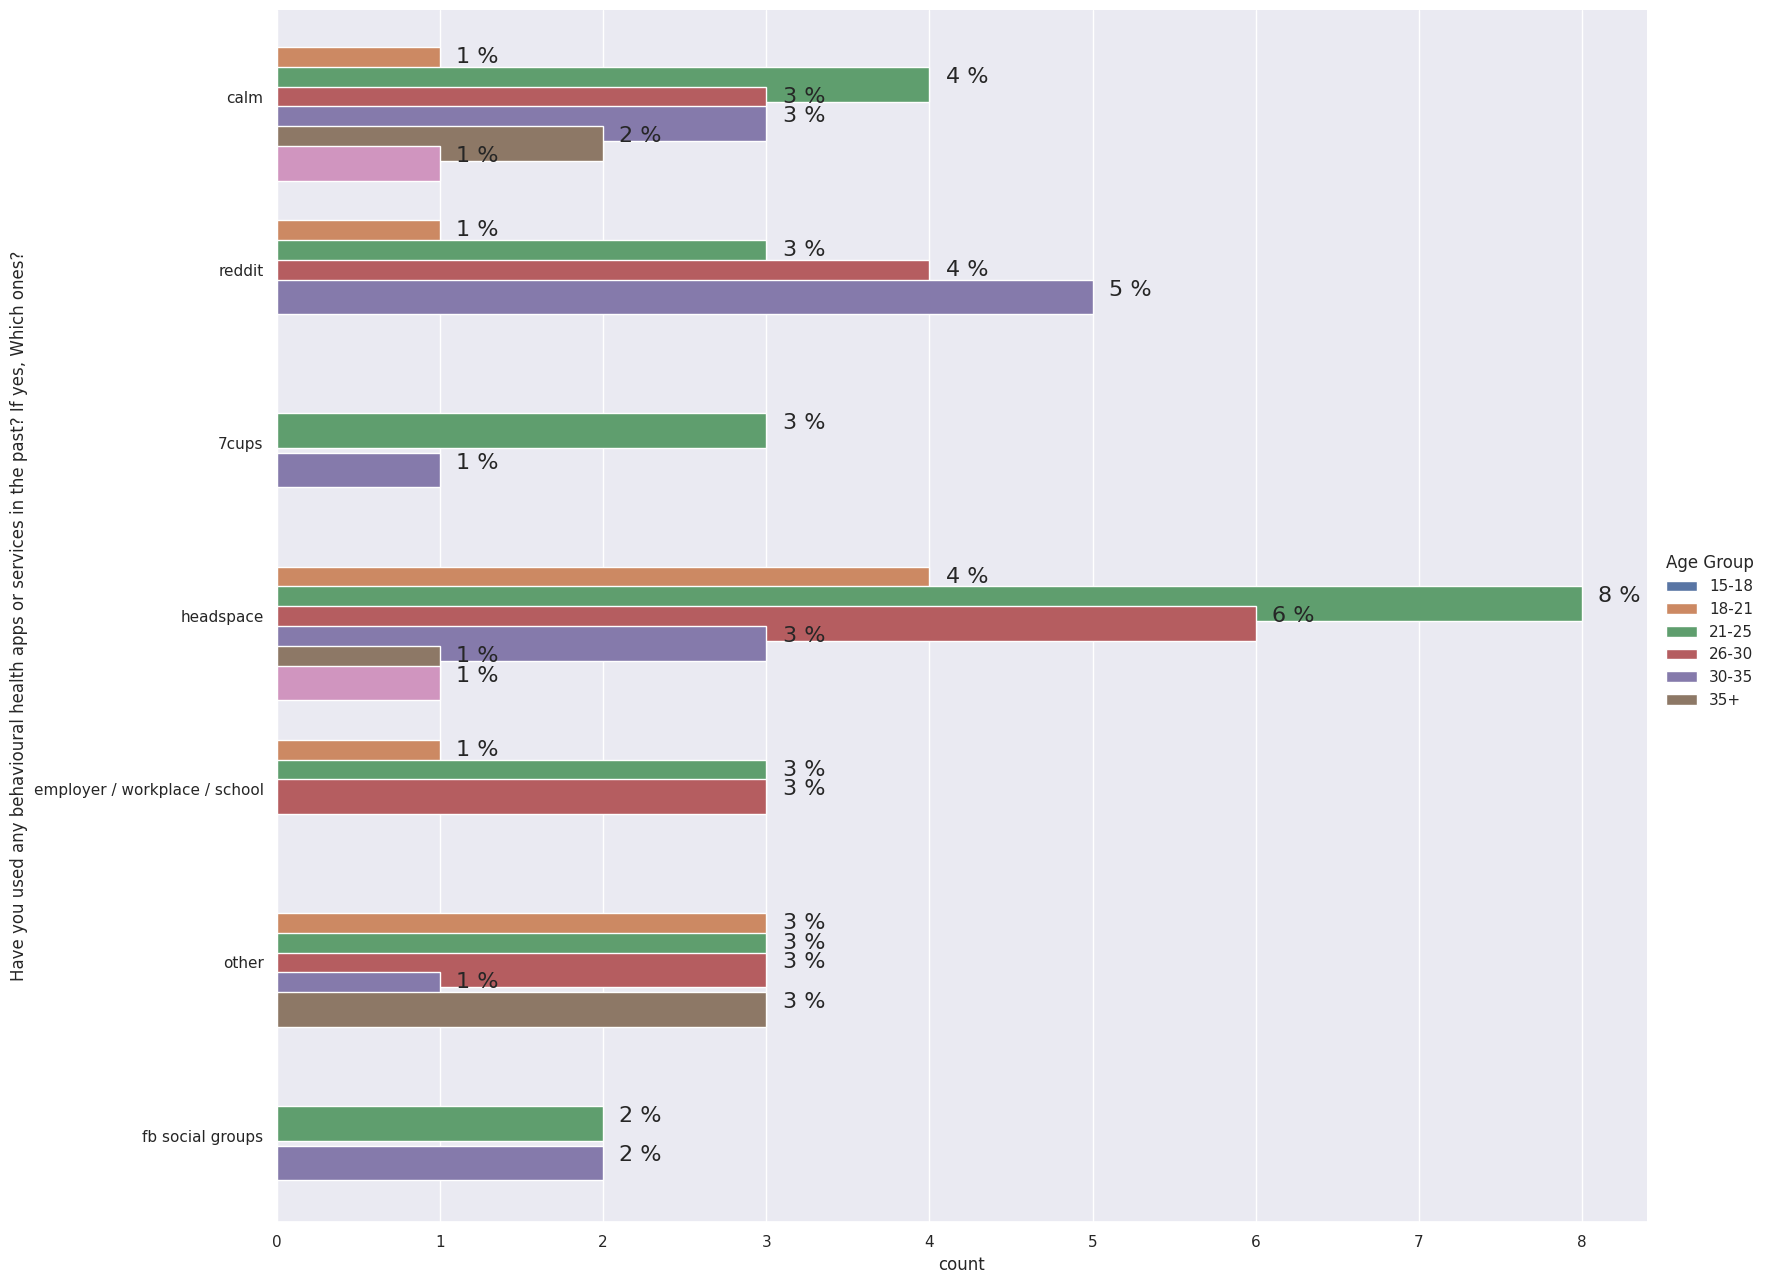

In [11]:
# How do platform preferences vary by age, gender, or other demographics?
def get_cross_attributes_graph_1(features_list, legend_list, feature_attribute_name, legend_name):
    df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    df[feature_attribute_name] = df[feature_attribute_name].fillna('')
    df[legend_name] = df[legend_name].fillna('')

    result_df3 = pd.DataFrame(index=features_list, columns=legend_list)
    for word in features_list:
        df[word] = df[feature_attribute_name].str.contains(word, case=False)
        filtered_df = df[df[word]]
        value_counts = filtered_df[legend_name].value_counts()
        for unique_value in value_counts.index:
            result_df3.loc[word, unique_value] = value_counts[unique_value]
    result_df3 = result_df3.reset_index().rename(columns={'index': feature_attribute_name})
    long_df2 = result_df3.melt(id_vars=feature_attribute_name, var_name=legend_name, value_name='count')
    sns.set(font_scale=10)
    width = 12
    height = 8
    sns.set(rc = {'figure.figsize':(width, height)})
    g = sns.catplot(data=long_df2, y=feature_attribute_name, x='count', hue=legend_name, kind='bar', height=13, aspect=1.3)
    ax = g.ax
    bar_width = 0.2
    for patch in ax.patches:
        current_height = patch.get_height()
        patch.set_height(bar_width)
    for p in ax.patches:
        count_text = '{:,.0f} %'.format(p.get_width())
        width, height = p.get_width(), p.get_height()
        x = p.get_x() + width + 0.1
        y = p.get_y() + bar_width / 3.5  # Use bar_width to align text correctly
        if count_text != '0 %':
            ax.annotate(count_text, (x, y), ha='left', va='center', fontsize=16)
    plt.show()
    
    
features_list = ['calm',
                 'reddit',
                 '7cups',
                 'headspace',
                 'employer / workplace / school', 'other', 'fb social groups']
legend_list = ['15-18', '18-21', '21-25', '26-30', '30-35', '35+']
feature_attribute_name = 'Have you used any behavioural health apps or services in the past? If yes, Which ones?'
legend_name = 'Age Group'
get_cross_attributes_graph_1(features_list, legend_list, feature_attribute_name, legend_name)

/tmp/ipykernel_33/20477111.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


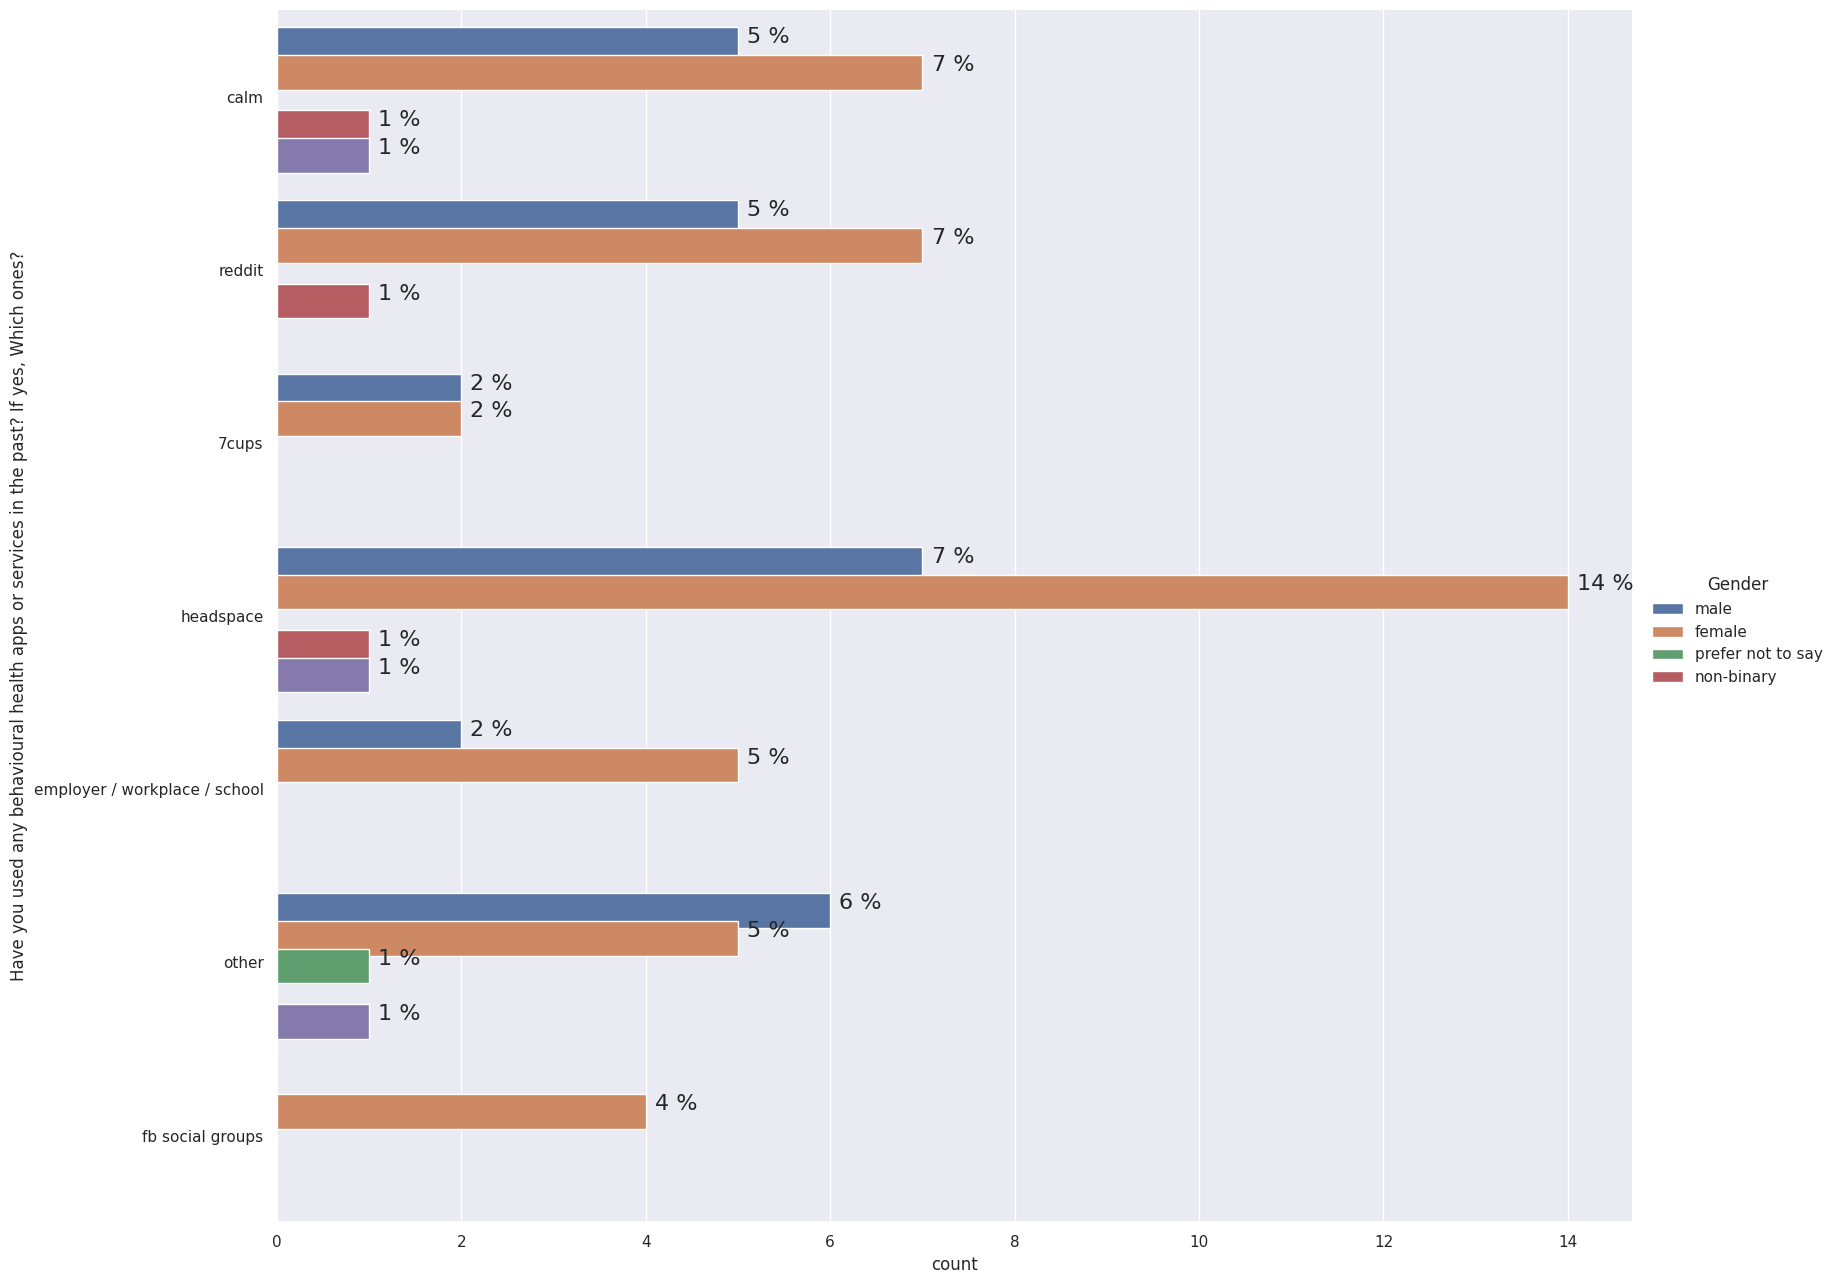

In [12]:
# Gender
features_list = ['calm',
                 'reddit',
                 '7cups',
                 'headspace',
                 'employer / workplace / school', 'other', 'fb social groups']
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
feature_attribute_name = 'Have you used any behavioural health apps or services in the past? If yes, Which ones?'
legend_name = 'Gender'
get_cross_attributes_graph_1(features_list, legend_list, feature_attribute_name, legend_name)

/tmp/ipykernel_33/2437721769.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


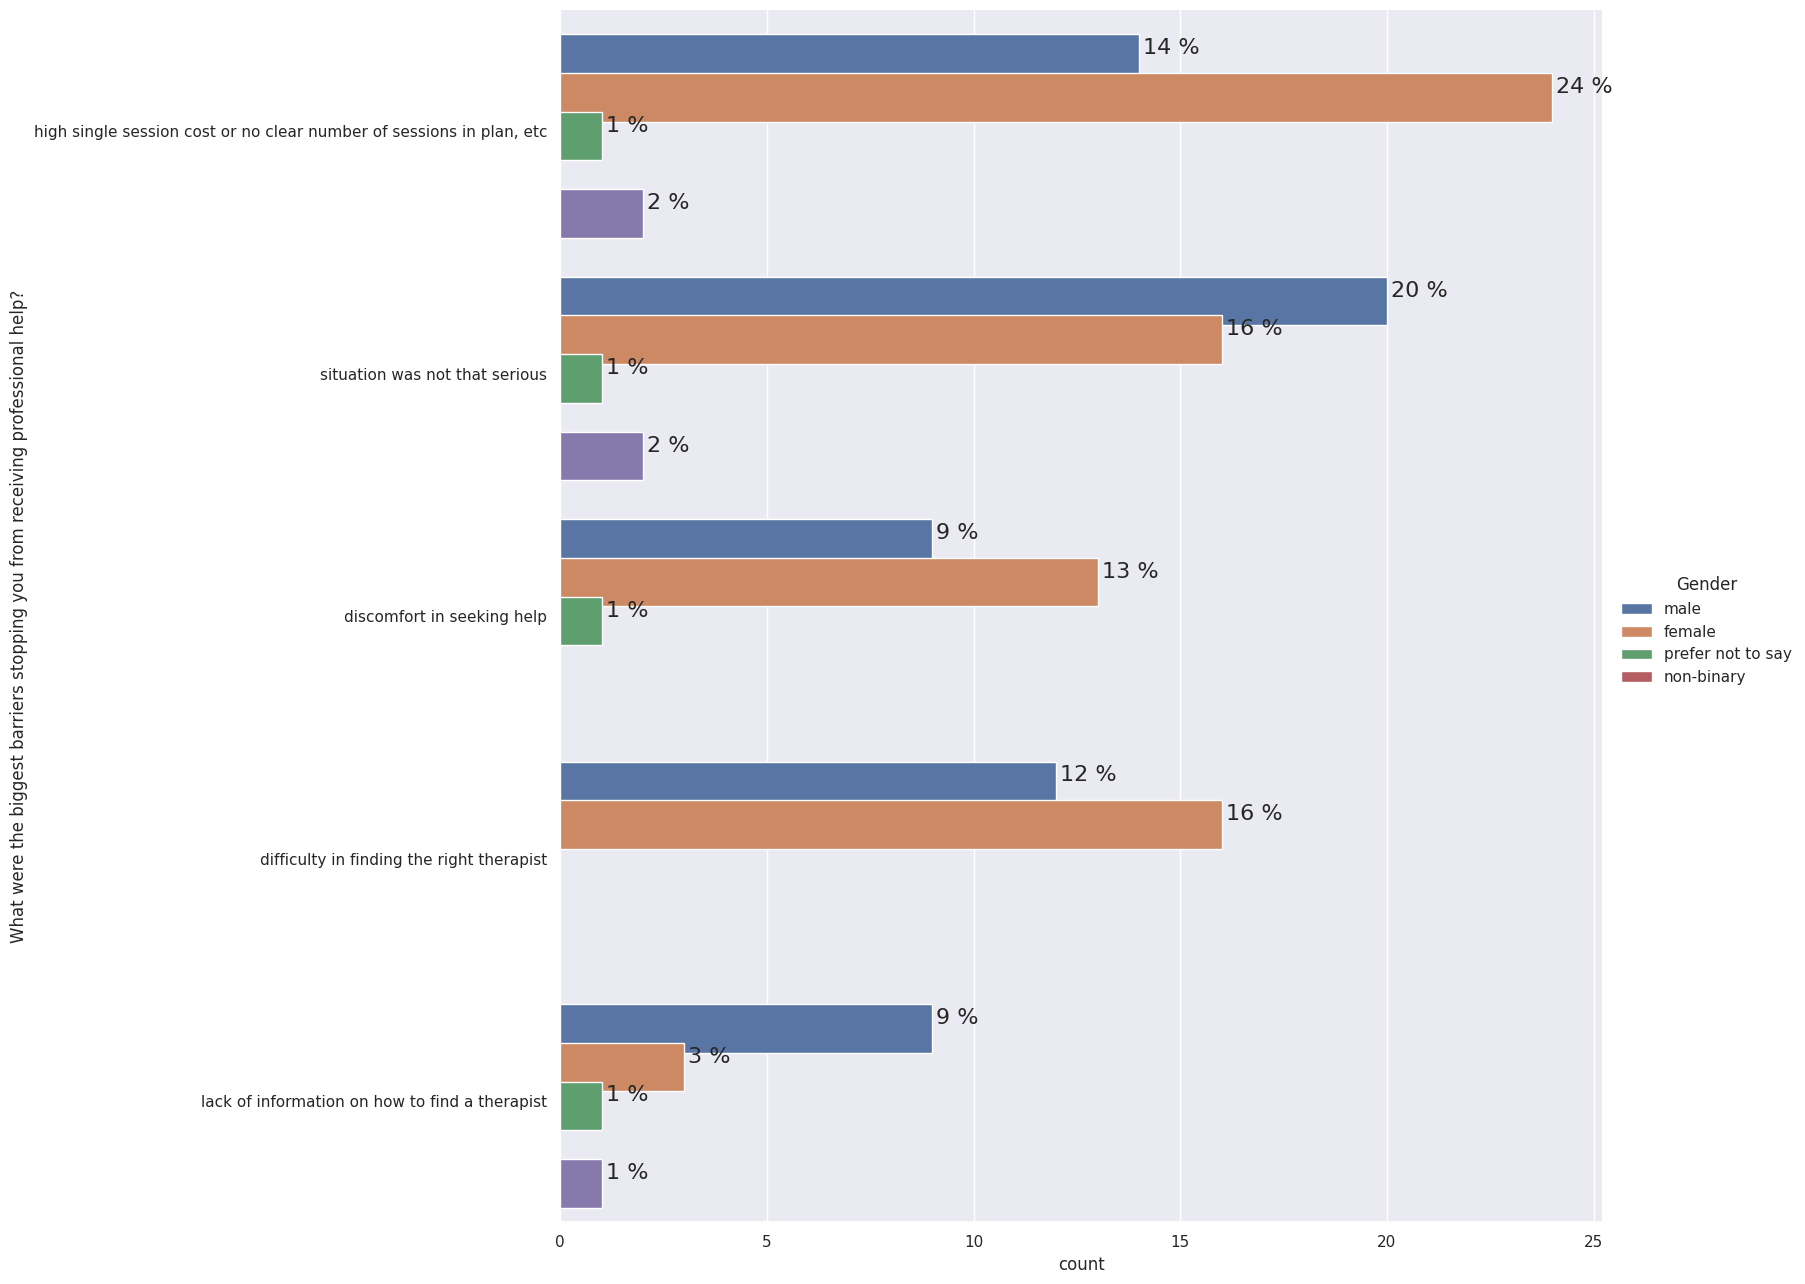

In [13]:
features_list = ['high single session cost',
                 'situation was not that serious',
                 'discomfort in seeking help',
                 'difficulty in finding the right therapist',
                 'lack of information on how to find a therapist']
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
feature_attribute_name = 'What were the biggest barriers stopping you from receiving professional help?'
legend_name = 'Gender'
get_cross_attributes_graph(features_list, legend_list, feature_attribute_name, legend_name)

/tmp/ipykernel_33/20477111.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


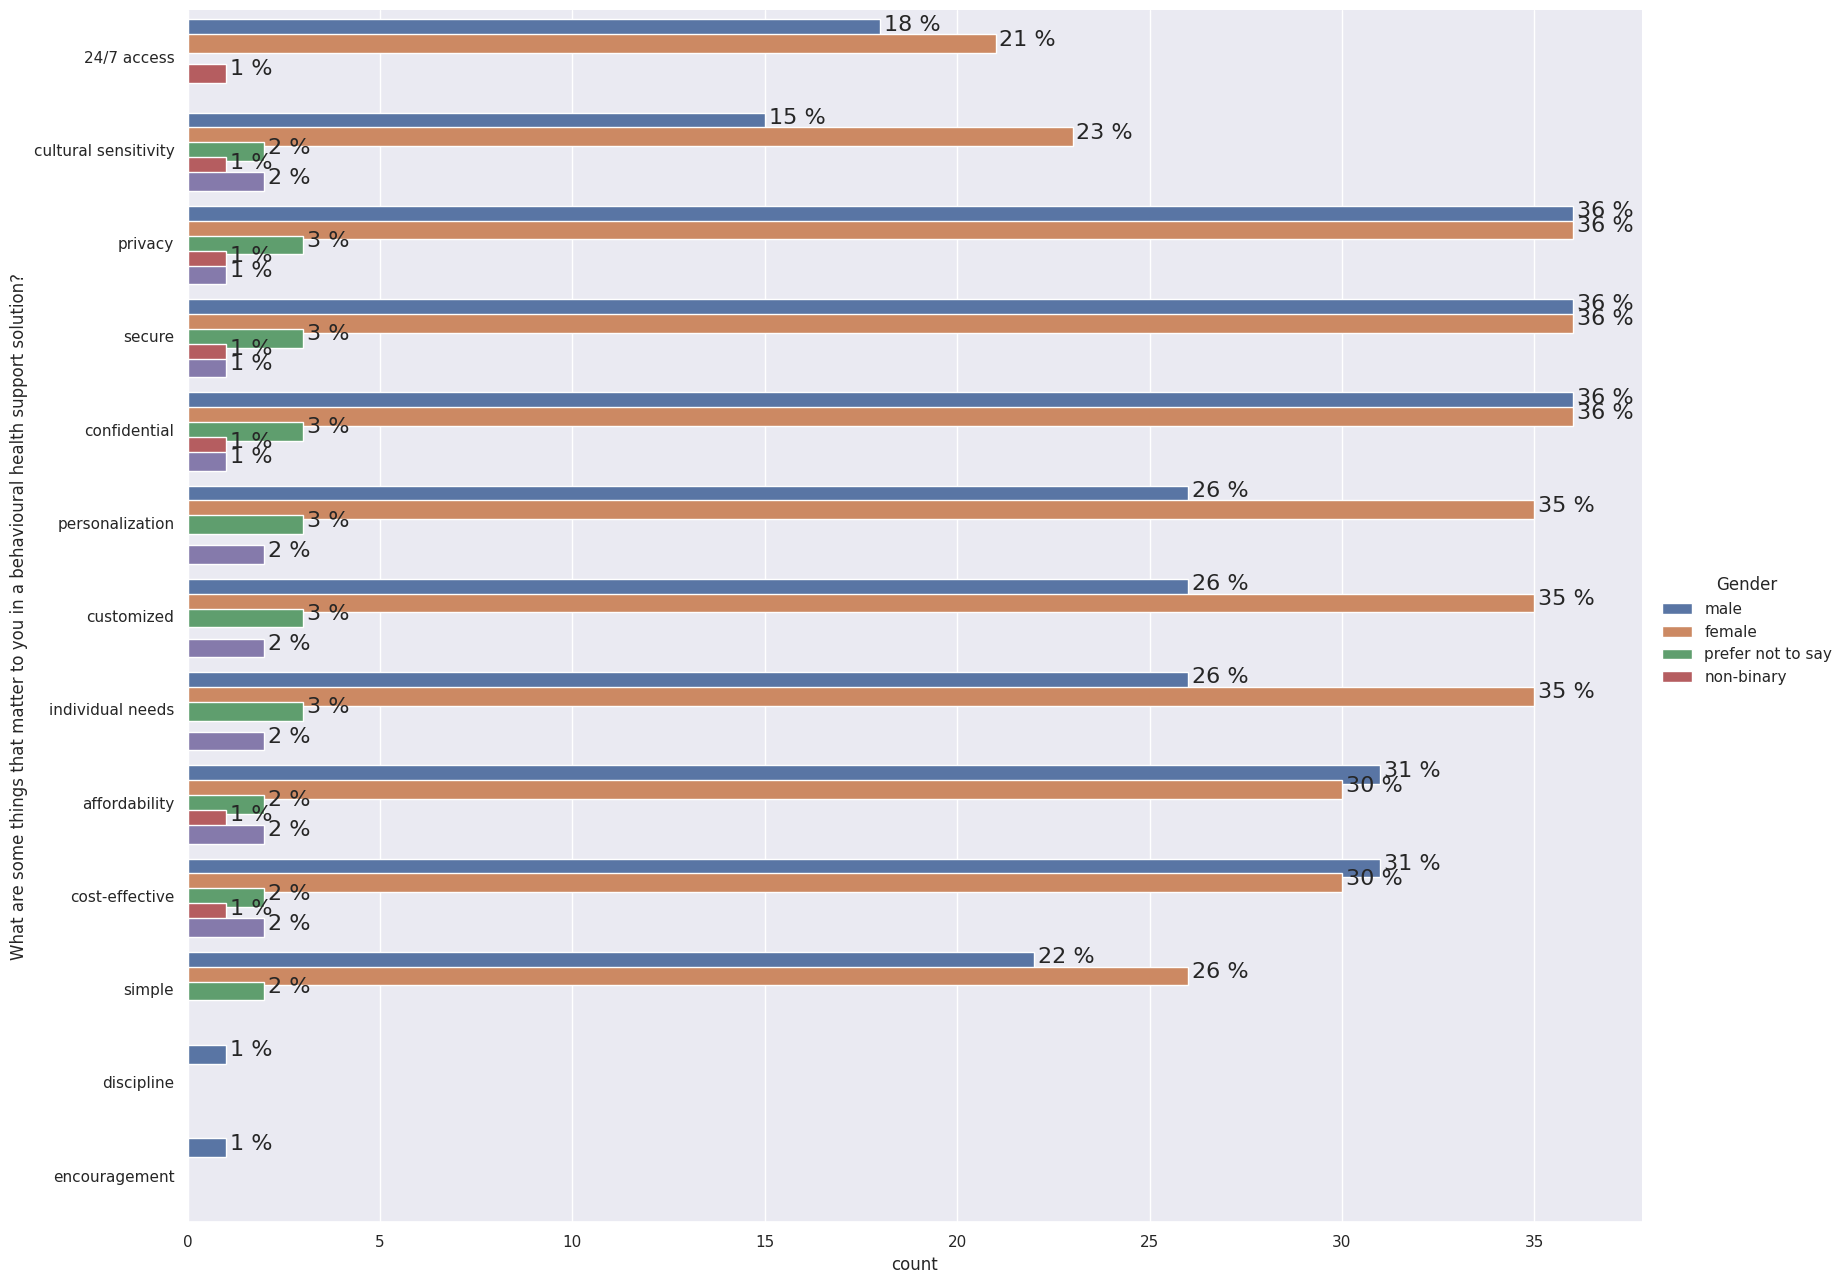

In [14]:
features_list = [
    '24/7 access',
    'cultural sensitivity',
    'privacy',
    'secure',
    'confidential',
    'personalization',
    'customized',
    'individual needs',
    'affordability',
    'cost-effective',
    'simple',
    'discipline',
    'encouragement'
]
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
feature_attribute_name = 'What are some things that matter to you in a behavioural health support solution?'
legend_name = 'Gender'
get_cross_attributes_graph_1(features_list, legend_list, feature_attribute_name, legend_name)

/tmp/ipykernel_33/2996137800.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


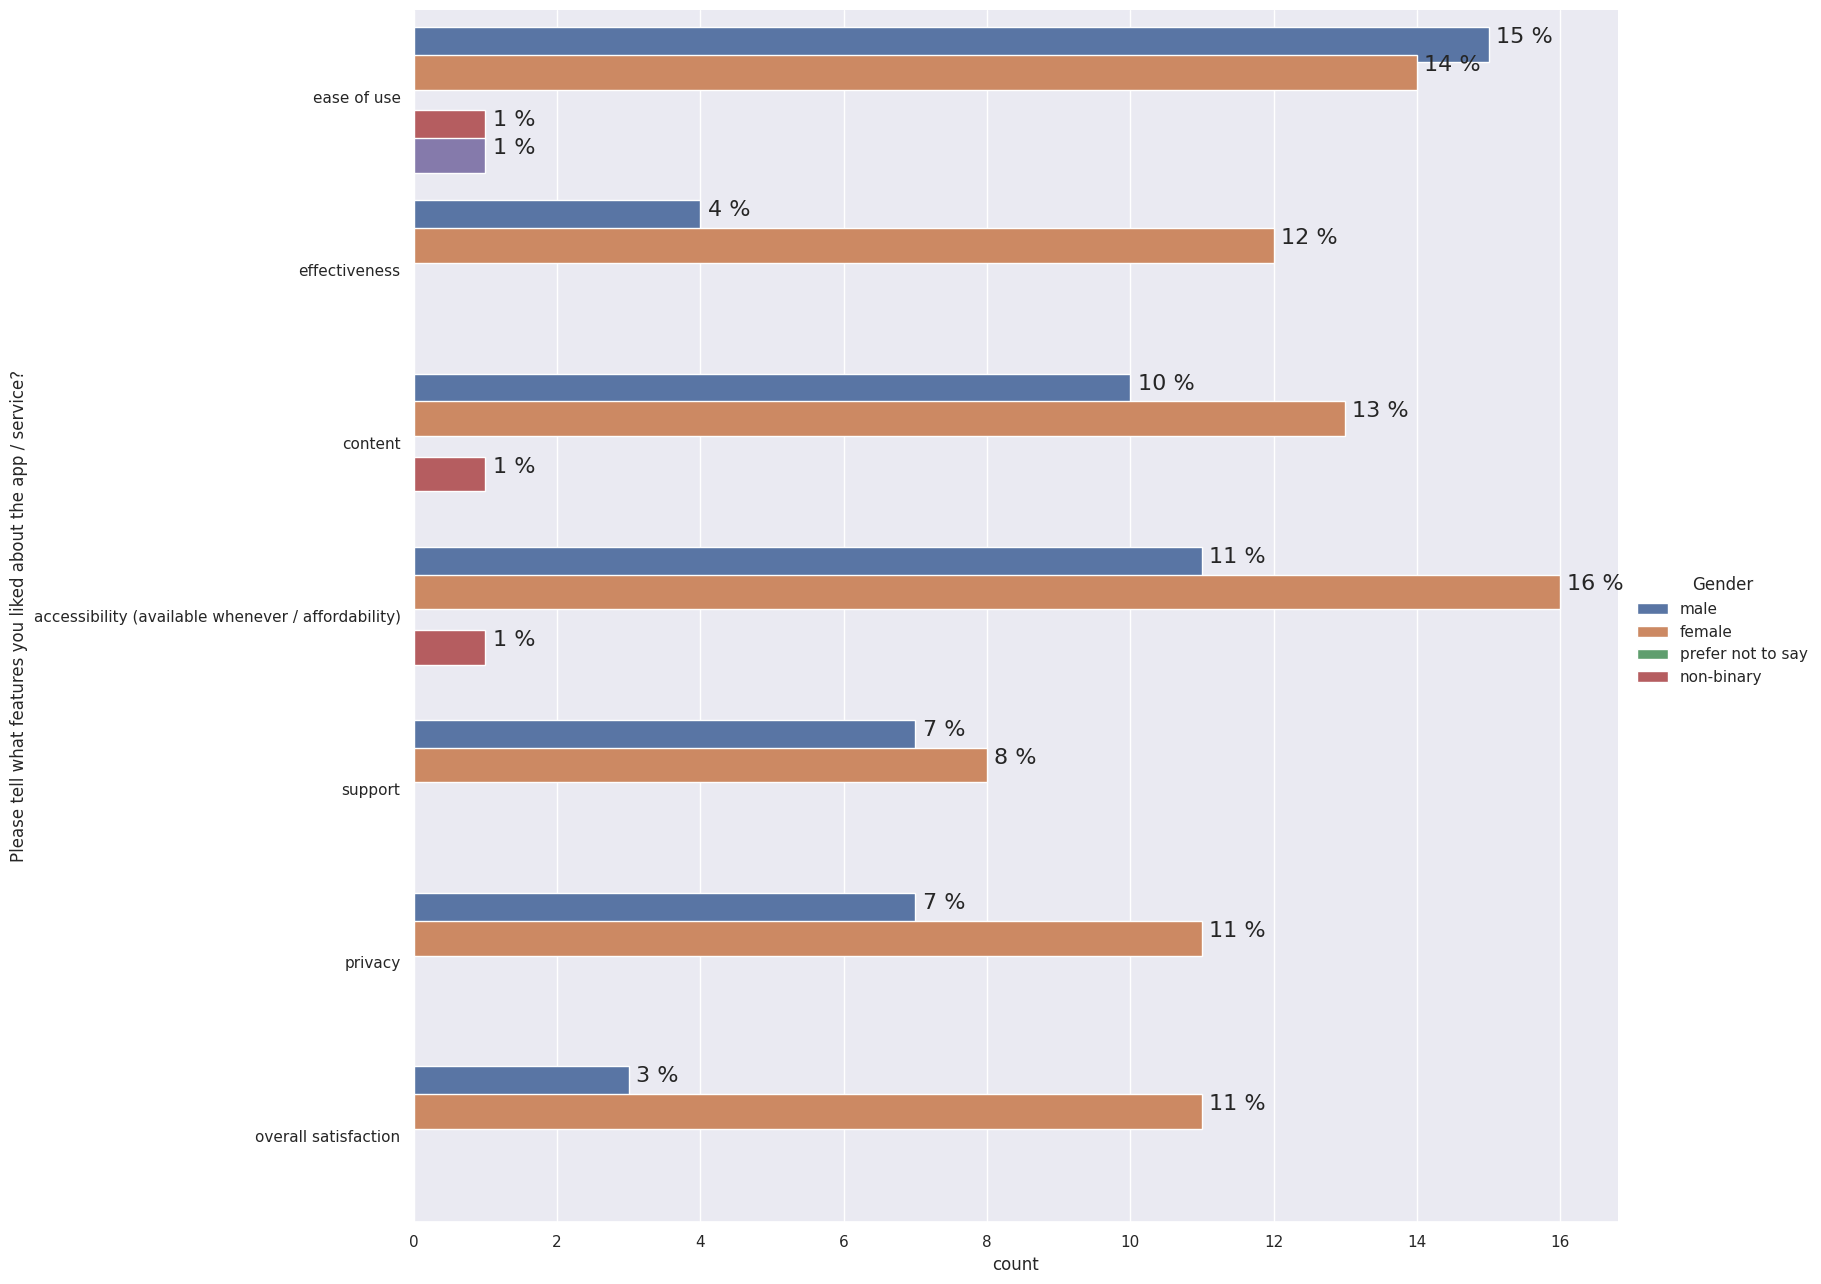

In [15]:

def get_cross_attributes_graph_2(features_list, legend_list, feature_attribute_name, legend_name):
    df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    df[feature_attribute_name] = df[feature_attribute_name].fillna('')
    df[legend_name] = df[legend_name].fillna('')

    result_df3 = pd.DataFrame(index=features_list, columns=legend_list)
    for word in features_list:
        df[word] = df[feature_attribute_name].str.contains(word, case=False)
        filtered_df = df[df[word]]
        value_counts = filtered_df[legend_name].value_counts()
        for unique_value in value_counts.index:
            result_df3.loc[word, unique_value] = value_counts[unique_value]
    result_df3 = result_df3.rename(index={'affordability': 'accessibility (available whenever / affordability)'})
    result_df3 = result_df3.reset_index().rename(columns={'index': feature_attribute_name})
    long_df2 = result_df3.melt(id_vars=feature_attribute_name, var_name=legend_name, value_name='count')
    sns.set(font_scale=10)
    width = 12
    height = 8
    sns.set(rc = {'figure.figsize':(width, height)})
    g = sns.catplot(data=long_df2, y=feature_attribute_name, x='count', hue=legend_name, kind='bar', height=13, aspect=1.3)
    ax = g.ax
    bar_width = 0.2
    for patch in ax.patches:
        current_height = patch.get_height()
        patch.set_height(bar_width)
    for p in ax.patches:
        count_text = '{:,.0f} %'.format(p.get_width())
        width, height = p.get_width(), p.get_height()
        x = p.get_x() + width + 0.1
        y = p.get_y() + bar_width / 3.5  # Use bar_width to align text correctly
        if count_text != '0 %':
            ax.annotate(count_text, (x, y), ha='left', va='center', fontsize=16)
    plt.show()

df['Please tell what features you liked about the app / service?'] = df['Please tell what features you liked about the app / service?'].fillna('')
features_list = [
    'ease of use', 'effectiveness', 'content',
    'affordability',
    'support', 'privacy', 'overall satisfaction'
]
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
feature_attribute_name = 'Please tell what features you liked about the app / service?'
legend_name = 'Gender'
get_cross_attributes_graph_2(features_list, legend_list, feature_attribute_name, legend_name)

In [56]:
def get_cross_attributes_graph_3d(features_list, legend_list, feature_attribute_name, legend_name, third_variable_name):
    df = pd.read_csv("/kaggle/input/dataset/Project Sukoon_ Help Us Help You - Sheet1.csv")
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    df[feature_attribute_name] = df[feature_attribute_name].fillna("did not respond")
    df[legend_name] = df[legend_name].fillna("did not respond")
    df[third_variable_name] = df[third_variable_name].fillna("did not respond")

    result_data = []
    for word in features_list:
        df[word] = df[feature_attribute_name].str.contains(word, case=False)
        filtered_df = df[df[word]]
        grouped_counts = filtered_df.groupby([third_variable_name, legend_name]).size().reset_index(name='count')
        grouped_counts[feature_attribute_name] = word
        result_data.append(grouped_counts)

    result_df3 = pd.concat(result_data, ignore_index=True)

    sns.set(font_scale=4)
    width = 12
    height = 8
    sns.set(rc={'figure.figsize': (width, height)})
    g = sns.catplot(
        data=result_df3, 
        y=feature_attribute_name, 
        x='count', 
        hue=legend_name, 
        col=third_variable_name, 
        kind='bar', 
        height=10, 
        aspect=1,
        col_wrap=2
    )
    
    for ax in g.axes.flat:
        for patch in ax.patches:
            current_height = patch.get_height()
            patch.set_height(0.4)
            count_text = '{:,.0f}'.format(patch.get_width())
            width = patch.get_width()
            x = patch.get_x() + width + 0.1
            y = patch.get_y() + patch.get_height() / 2
            if count_text != '0':
                ax.annotate(count_text, (x, y), ha='left', va='center', fontsize=16)

    plt.show()

In [57]:
df[df['What were the biggest barriers stopping you from receiving professional help?'].fillna('').str.contains('high single session cost', case=False)].fillna('')[['Gender', 'Age Group', 'What were the biggest barriers stopping you from receiving professional help?']]

/tmp/ipykernel_34/1550868386.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[df['What were the biggest barriers stopping you from receiving professional help?'].fillna('').str.contains('high single session cost', case=False)].fillna('')[['Gender', 'Age Group', 'What were the biggest barriers stopping you from receiving professional help?']]


Gender Age Group  \
8               female     21-25   
12                male     21-25   
18              female     21-25   
27                male     26-30   
32                male     26-30   
35                male     21-25   
37              female     18-21   
38              female     30-35   
39                         18-21   
41                male     21-25   
43                male     26-30   
44                male     21-25   
47                male     30-35   
49              female     30-35   
52              female     30-35   
53              female     30-35   
60              female     30-35   
62              female     30-35   
63                male     21-25   
65              female     21-25   
69              female     18-21   
70              female     21-25   
72   prefer not to say     21-25   
73                male     26-30   
76              female     18-21   
80              female     21-25   
83                         26-30   
87                male       35+   
88              female       35+   
89                male     26-30   
92              female     18-21   
93              female     21-25   
94              female     21-25   
95                male     21-25   
96                male     21-25   
98              female     21-25   
102             female     21-25   
104             female     21-25   
105             female     21-25   
106             female     26-30   
109             female     30-35   

    What were the biggest barriers stopping you from receiving professional help?  
8    cost (like high single session cost / no clear...                             
12   cost (like high single session cost / no clear...                             
18   cost (like high single session cost / no clear...                             
27   cost (like high single session cost / no clear...                             
32   cost (like high single session cost / no clear...                             
35   cost (like high single session cost / no clear...                             
37   cost (like high single session cost / no clear...                             
38   cost (like high single session cost / no clear...                             
39   lack of information on how to find a therapist...                             
41   discomfort in seeking help, cost (like high si...                             
43   cost (like high single session cost / no clear...                             
44   cost (like high single session cost / no clear...                             
47   cost (like high single session cost / no clear...                             
49   cost (like high single session cost / no clear...                             
52   cost (like high single session cost / no clear...                             
53   cost (like high single session cost / no clear...                             
60   cost (like high single session cost / no clear...                             
62   discomfort in seeking help, cost (like high si...                             
63   cost (like high single session cost / no clear...                             
65   cost (like high single session cost / no clear...                             
69   cost (like high single session cost / no clear...                             
70   cost (like high single session cost / no clear...                             
72   cost (like high single session cost / no clear...                             
73   cost (like high single session cost / no clear...                             
76   cost (like high single session cost / no clear...                             
80   cost (like high single session cost / no clear...                             
83   cost (like high single session cost / no clear...                             
87   cost (like high single session cost / no clear...                             
88   situation was not that serious, cost (like hig...             

/tmp/ipykernel_34/1543830258.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pas

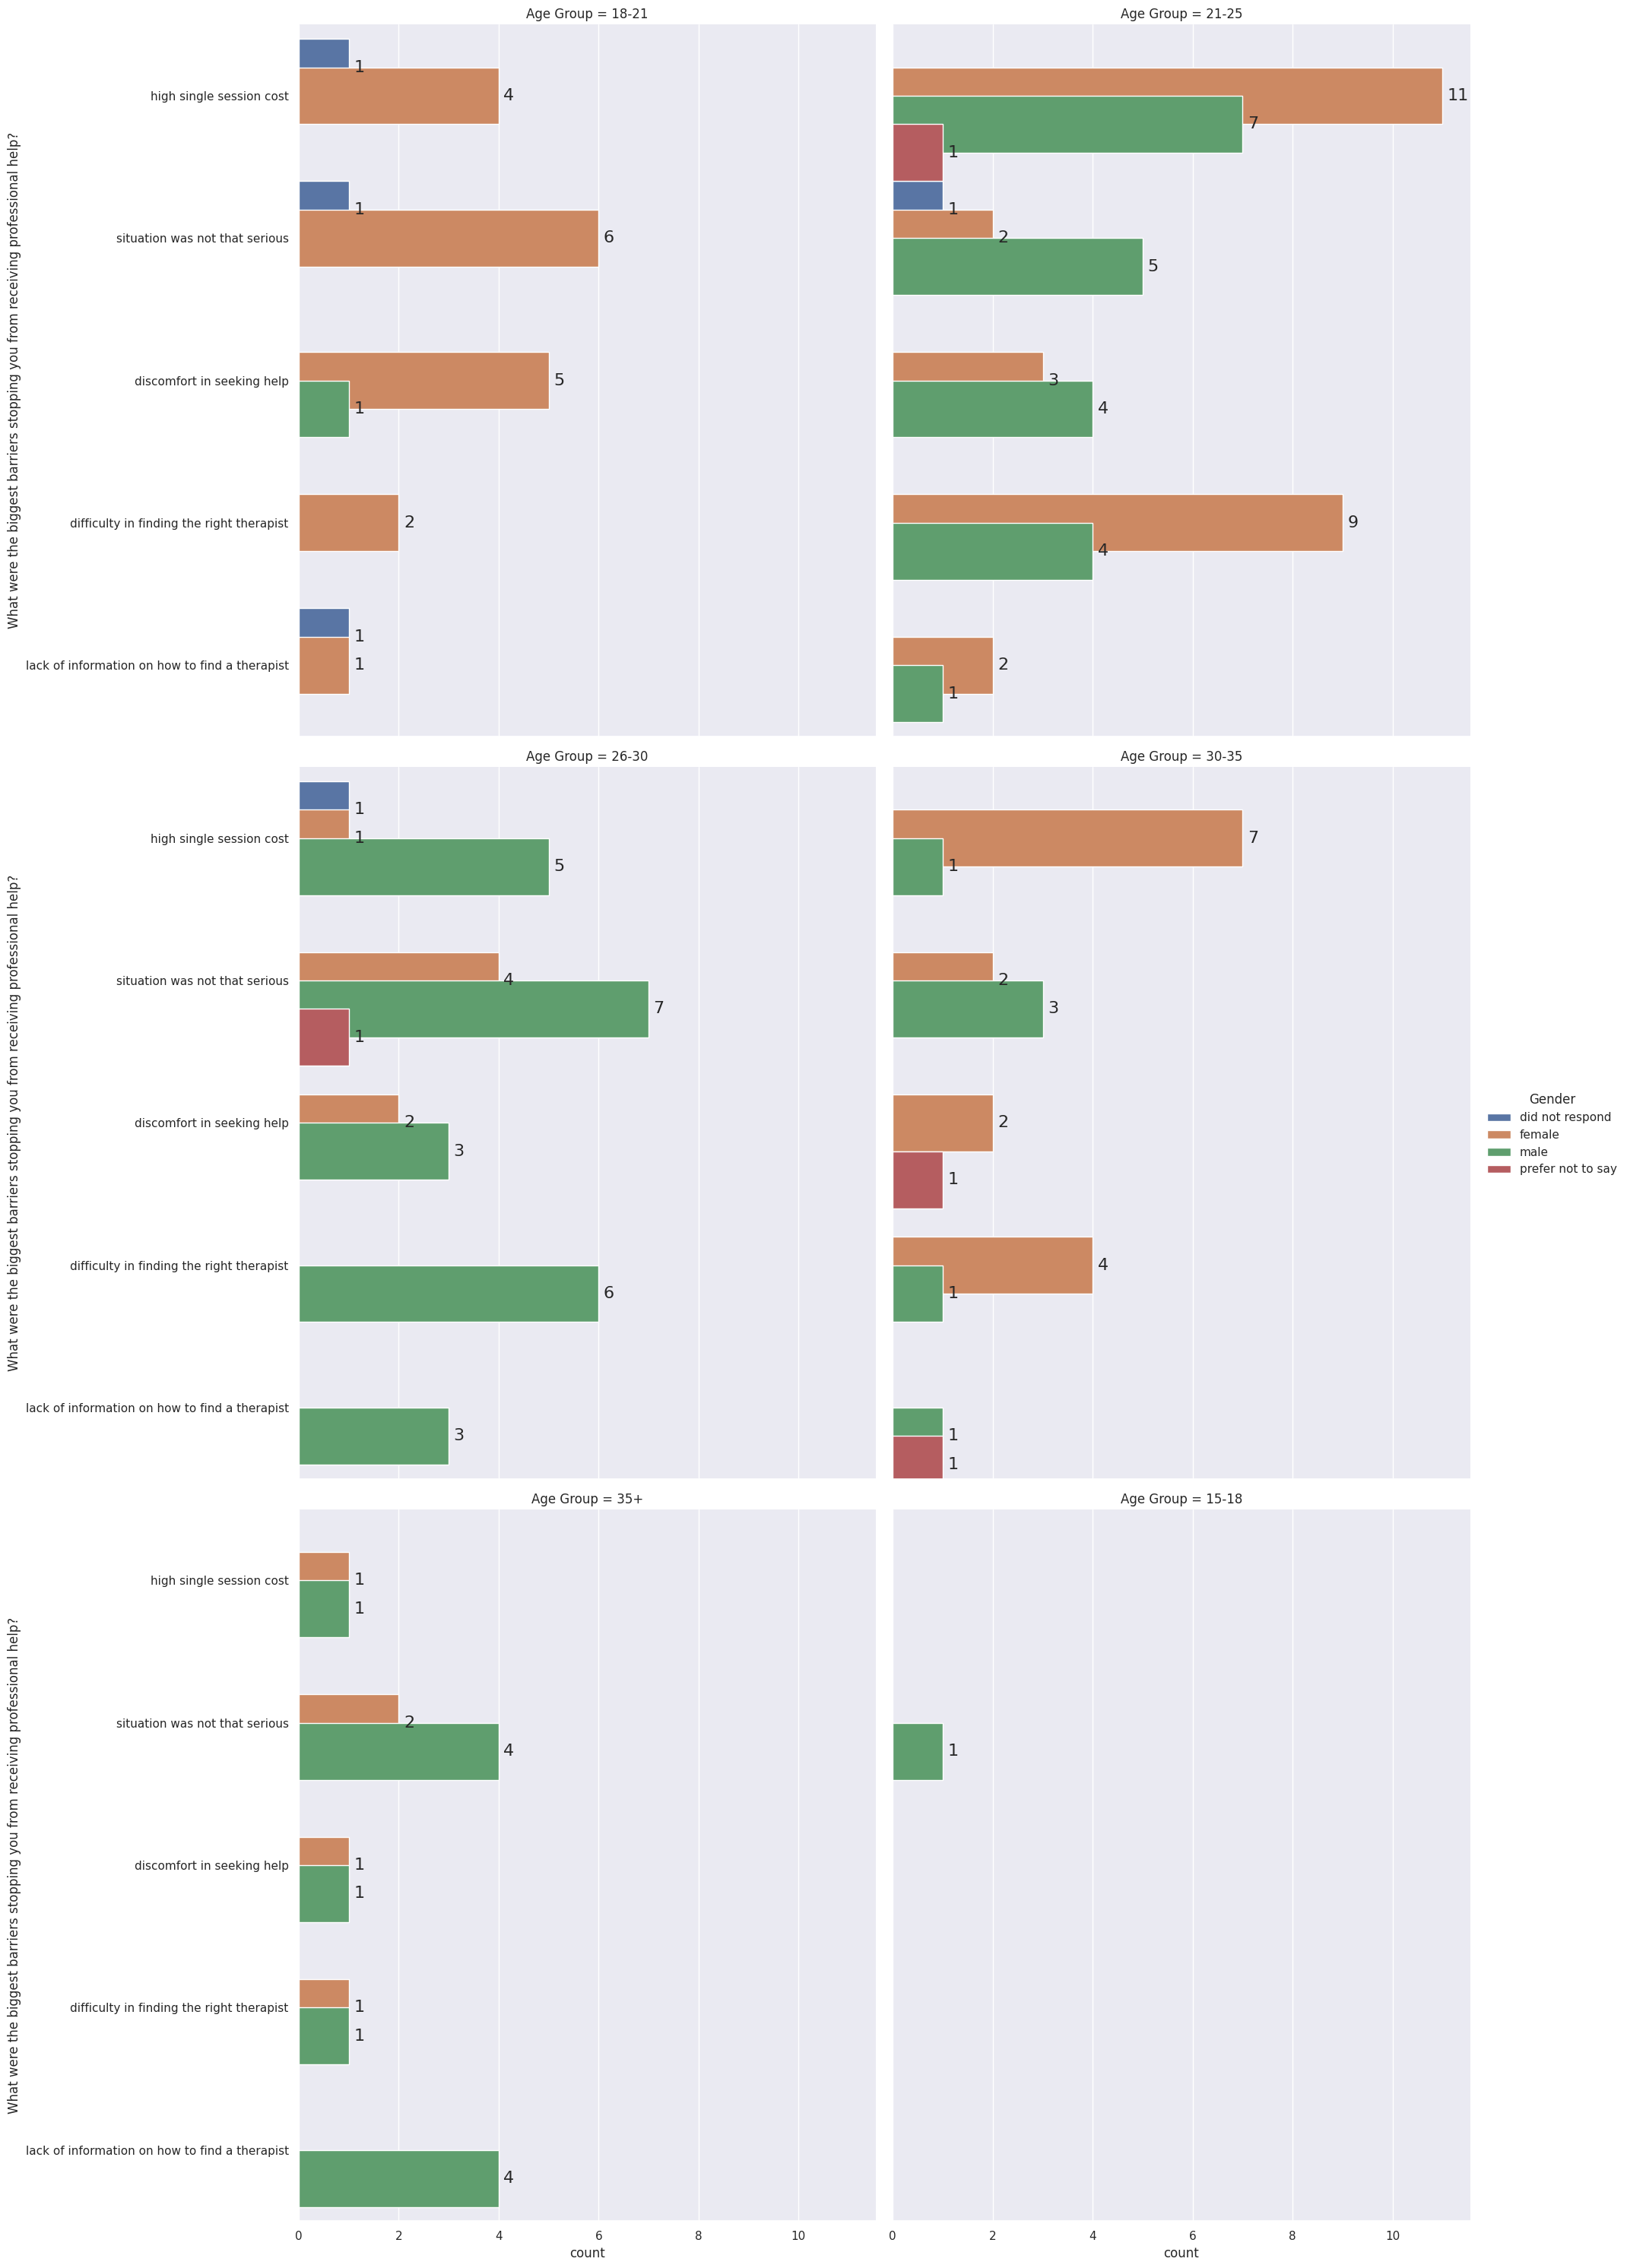

In [58]:
features_list = ['high single session cost',
                 'situation was not that serious',
                 'discomfort in seeking help',
                 'difficulty in finding the right therapist',
                 'lack of information on how to find a therapist']
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
feature_attribute_name = 'What were the biggest barriers stopping you from receiving professional help?'
legend_name = 'Gender'
get_cross_attributes_graph_3d(features_list, legend_list, feature_attribute_name, legend_name, 'Age Group')

/tmp/ipykernel_34/1543830258.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


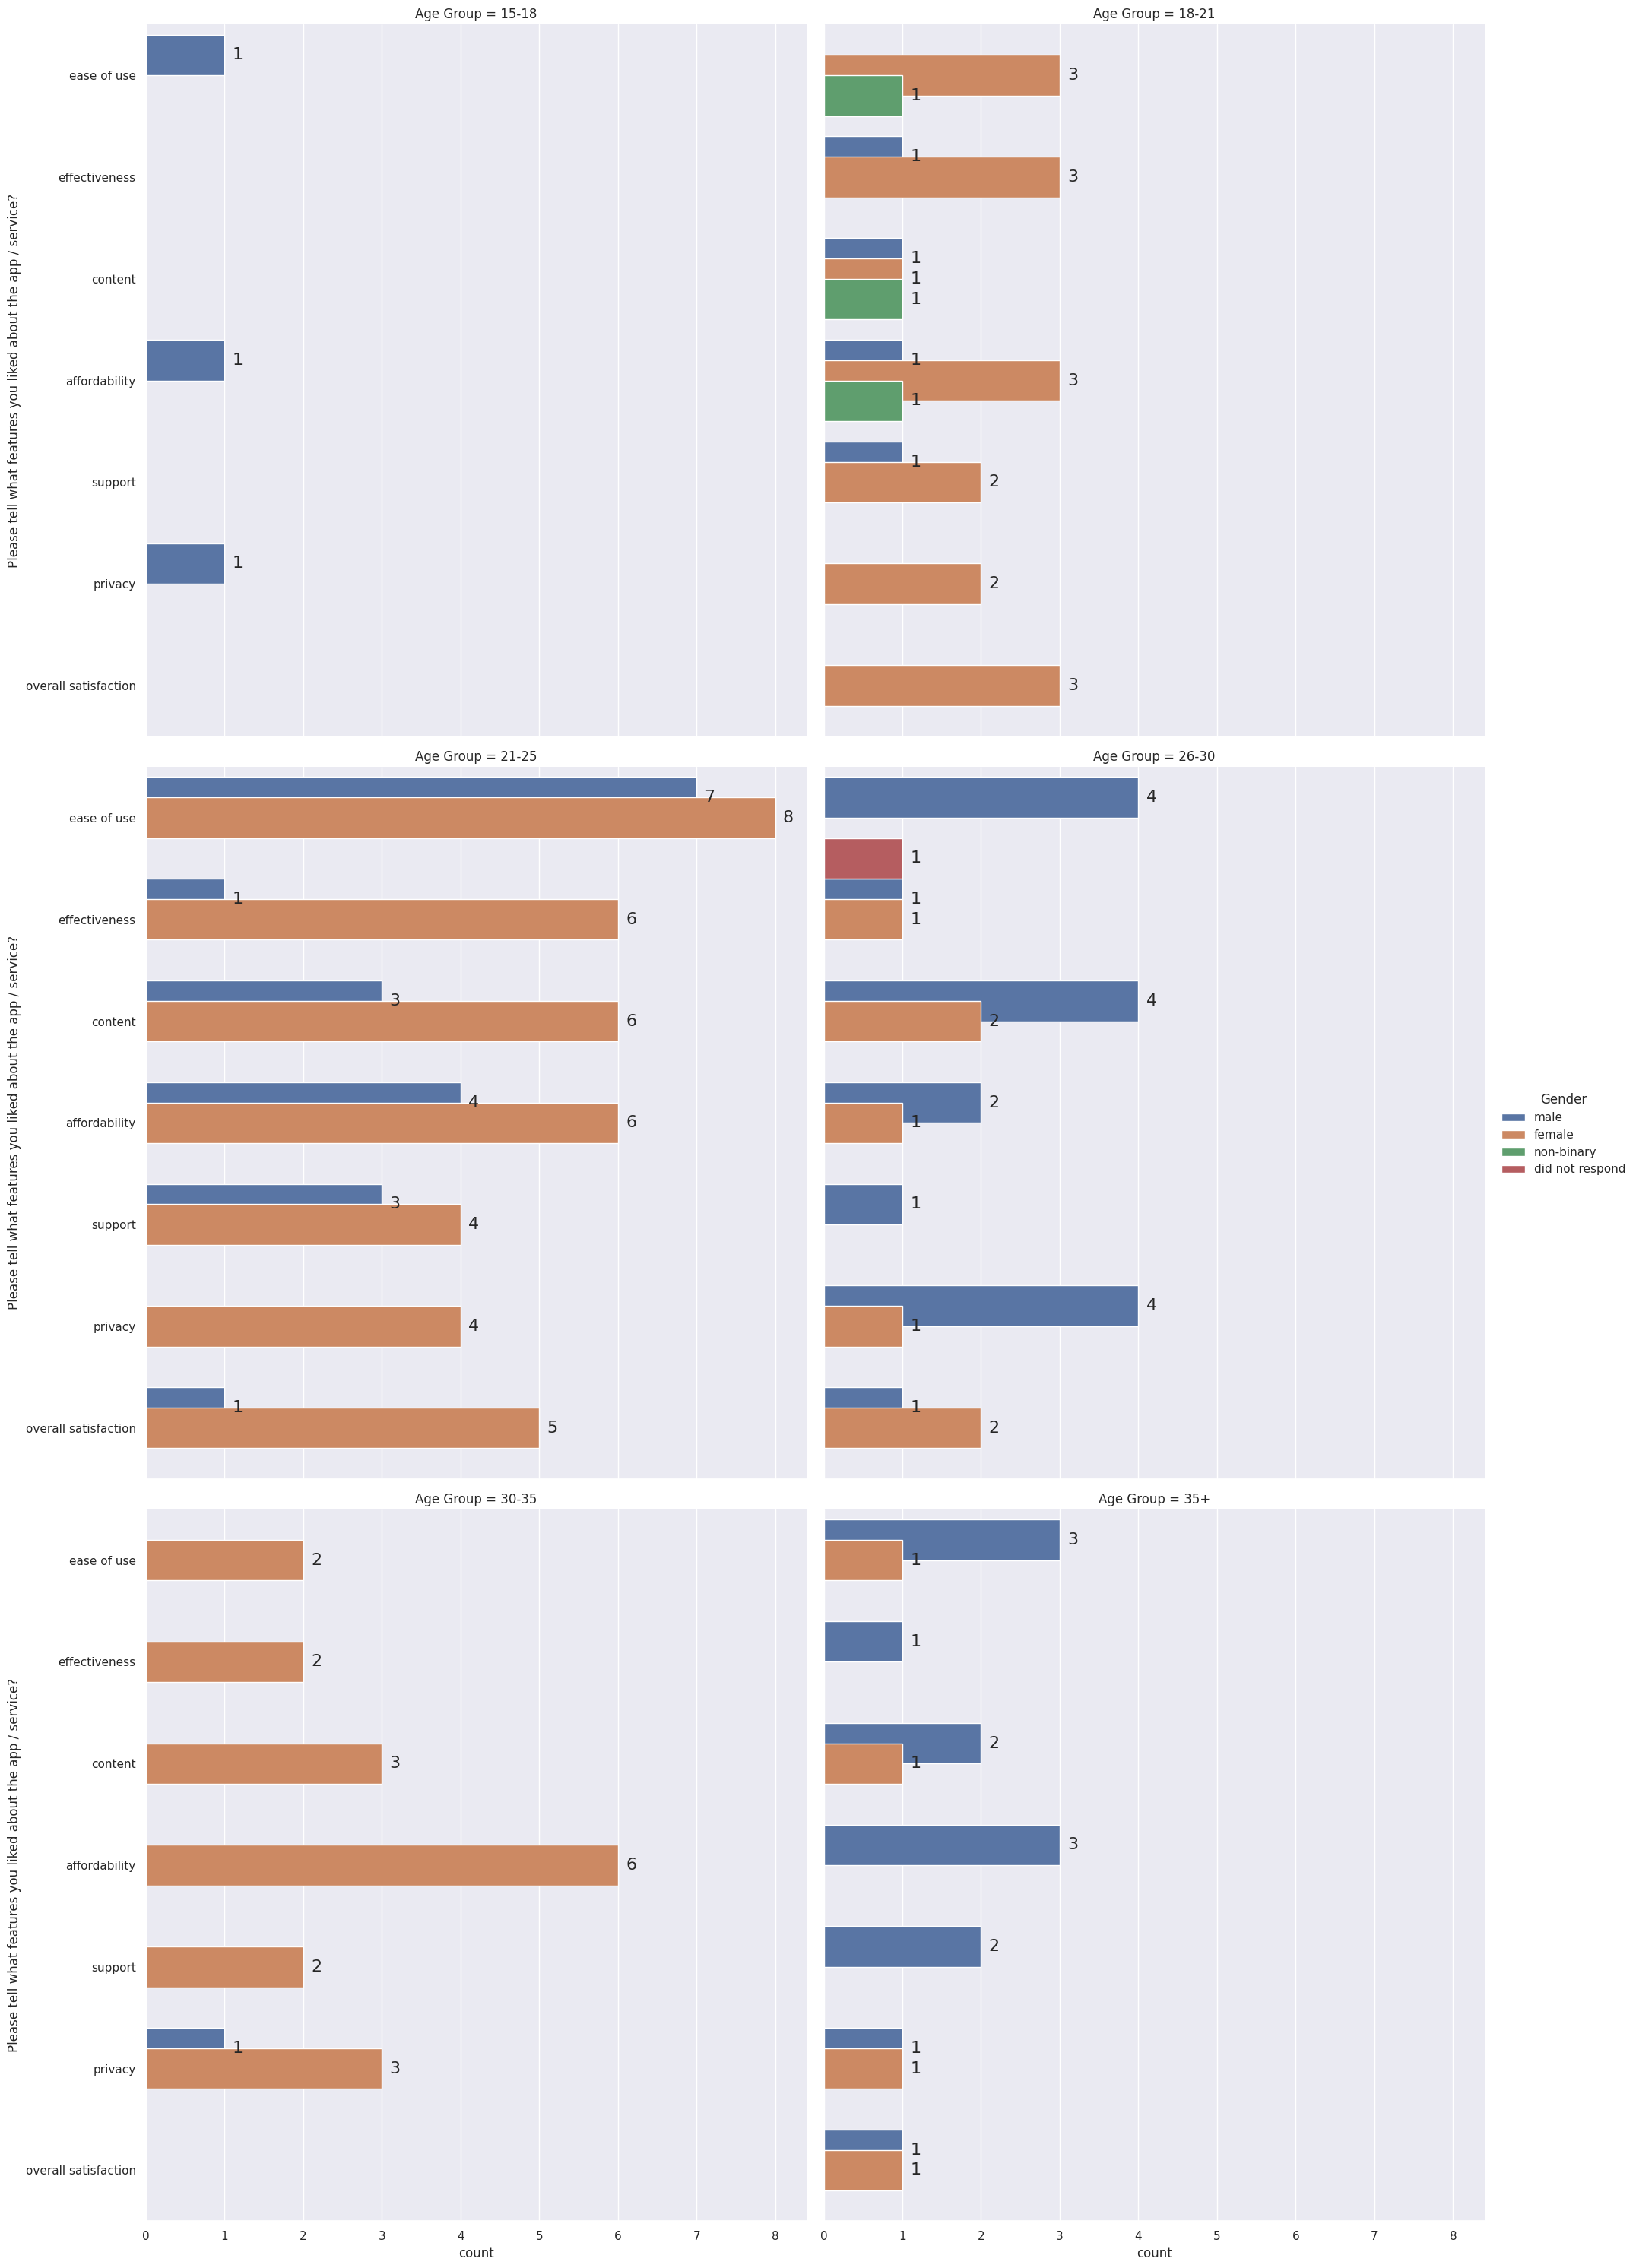

In [59]:
features_list = [
    'ease of use', 'effectiveness', 'content',
    'affordability',
    'support', 'privacy', 'overall satisfaction'
]
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
feature_attribute_name = 'Please tell what features you liked about the app / service?'
legend_name = 'Gender'
get_cross_attributes_graph_3d(features_list, legend_list, feature_attribute_name, legend_name, 'Age Group')

In [48]:
df['Age Group'].value_counts()

Age Group
21-25    40
26-30    24
18-21    19
35+      14
30-35    14
15-18     1
Name: count, dtype: int64

/tmp/ipykernel_34/1543830258.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


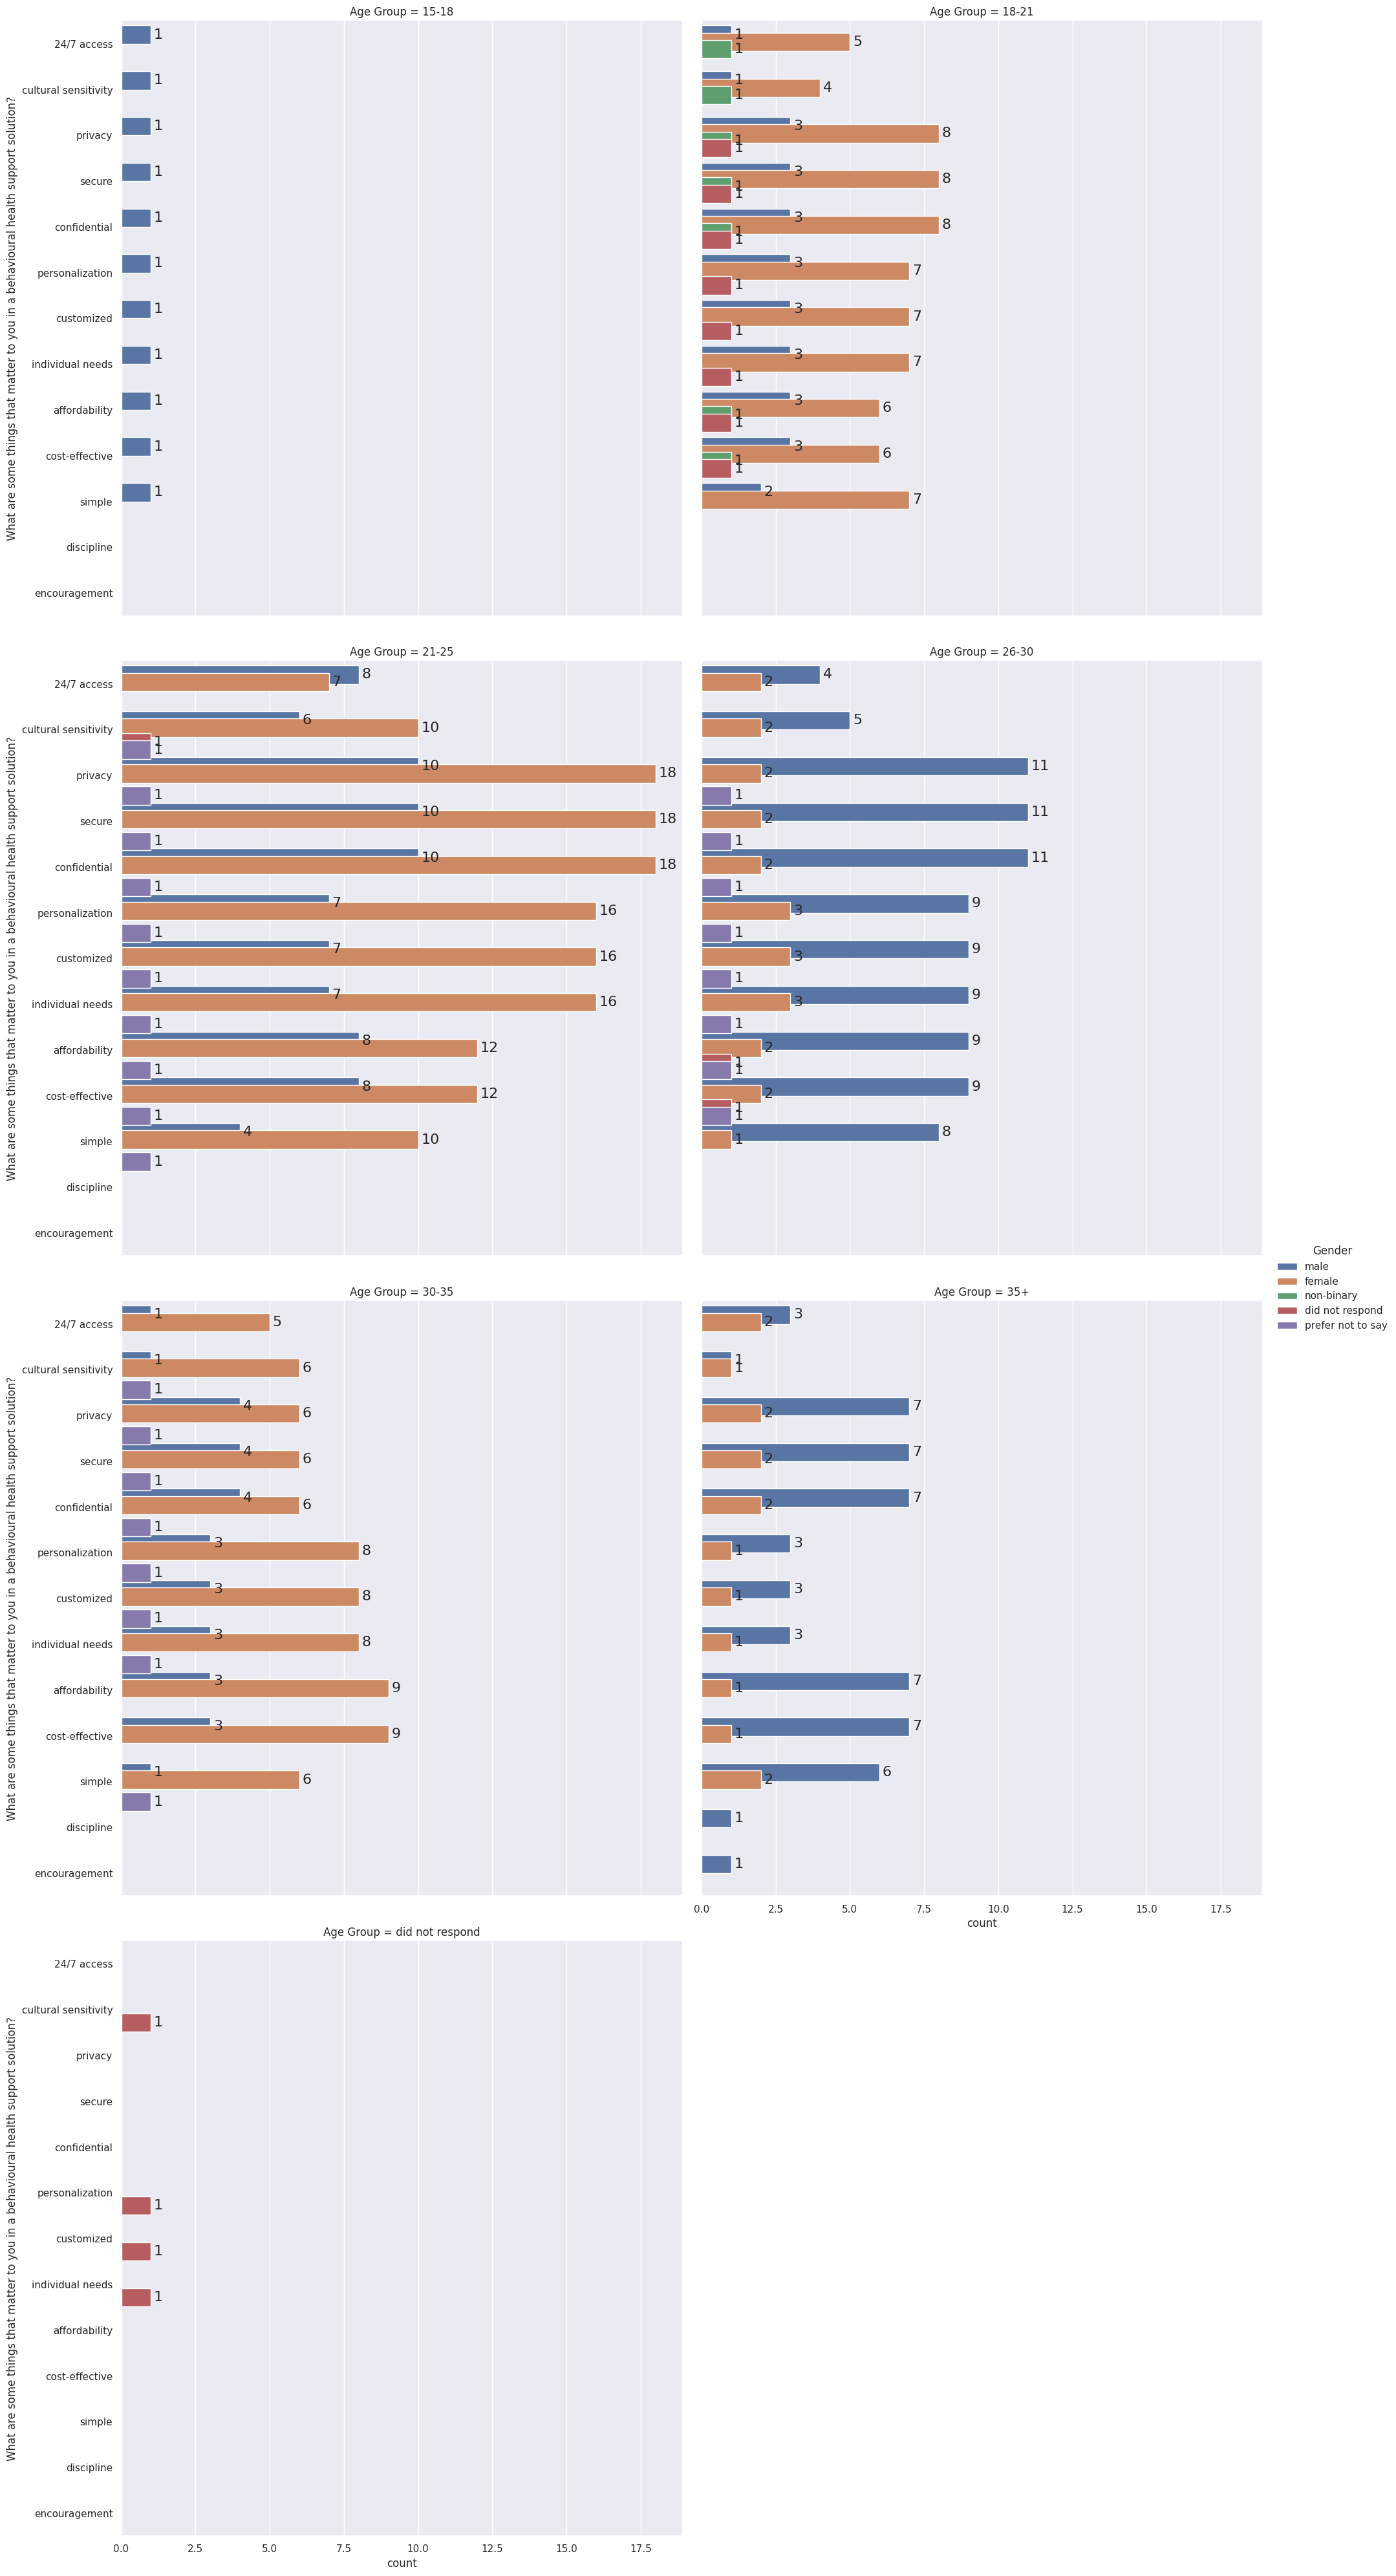

In [60]:
features_list = [
    '24/7 access',
    'cultural sensitivity',
    'privacy',
    'secure',
    'confidential',
    'personalization',
    'customized',
    'individual needs',
    'affordability',
    'cost-effective',
    'simple',
    'discipline',
    'encouragement'
]
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
feature_attribute_name = 'What are some things that matter to you in a behavioural health support solution?'
legend_name = 'Gender'
get_cross_attributes_graph_3d(features_list, legend_list, feature_attribute_name, legend_name, 'Age Group')

/tmp/ipykernel_34/1543830258.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


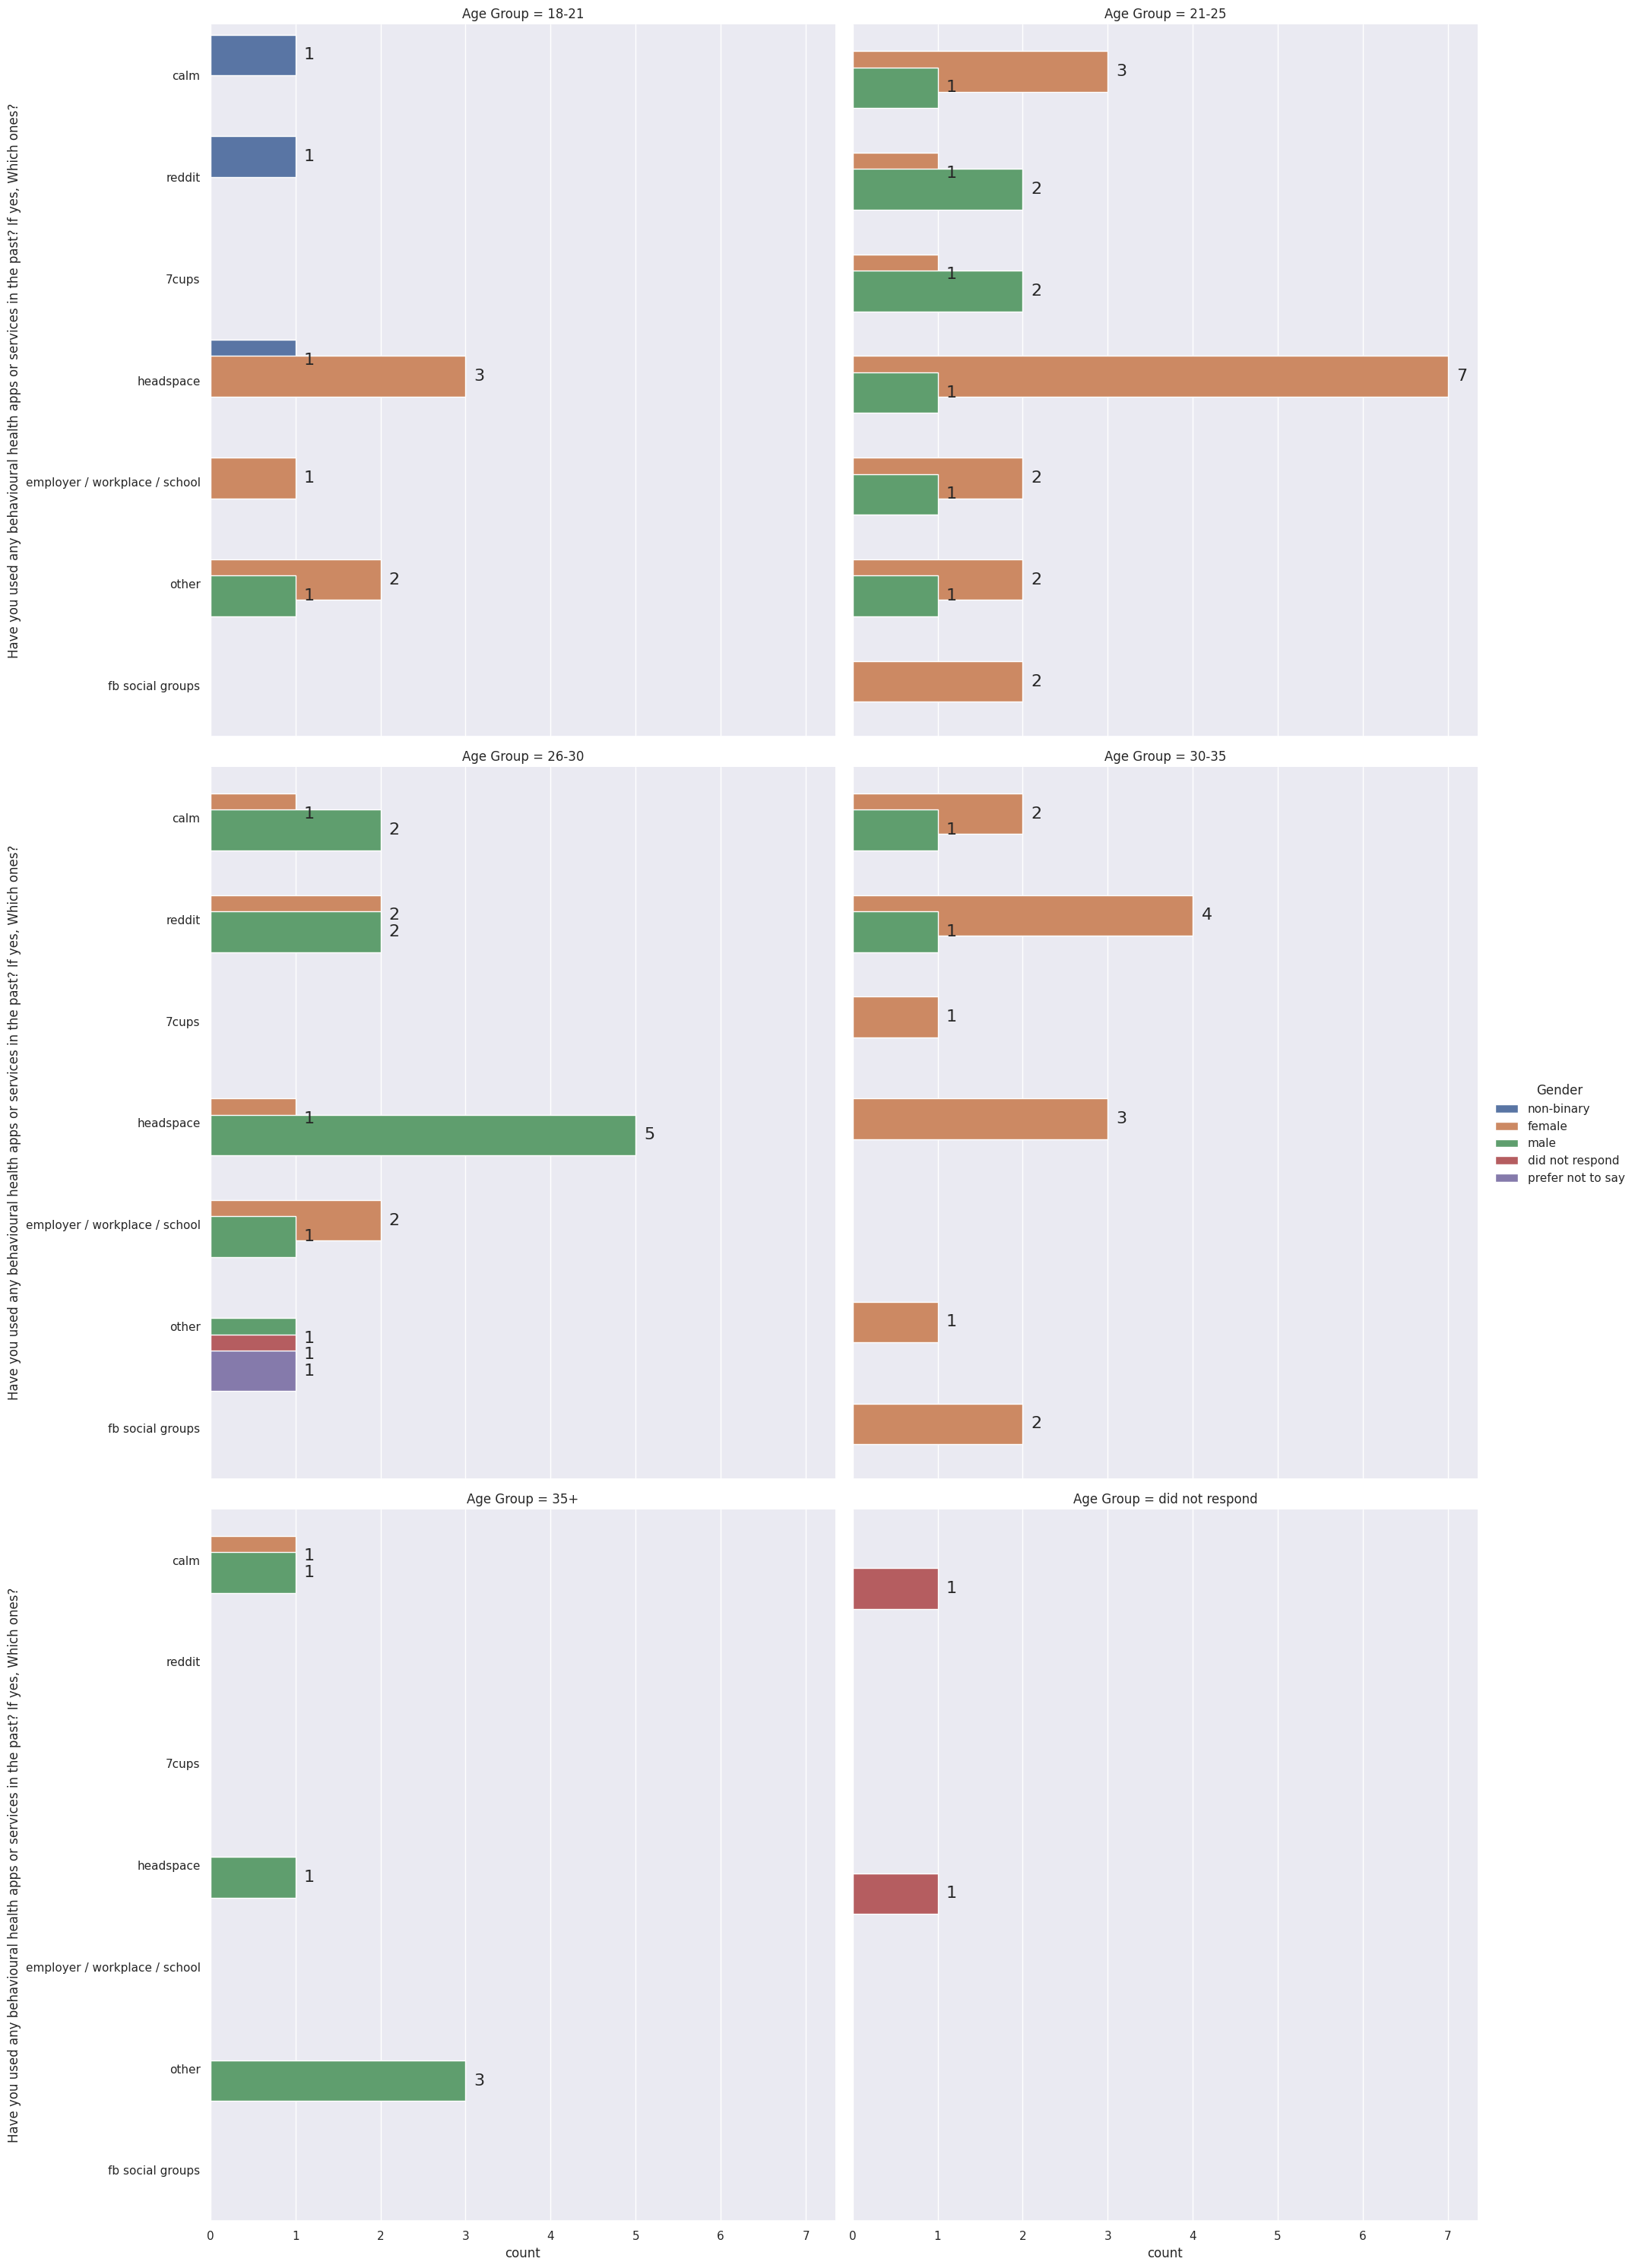

In [61]:
# Gender
features_list = ['calm',
                 'reddit',
                 '7cups',
                 'headspace',
                 'employer / workplace / school', 'other', 'fb social groups']
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
feature_attribute_name = 'Have you used any behavioural health apps or services in the past? If yes, Which ones?'
legend_name = 'Gender'
get_cross_attributes_graph_3d(features_list, legend_list, feature_attribute_name, legend_name, 'Age Group')

/tmp/ipykernel_34/1543830258.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


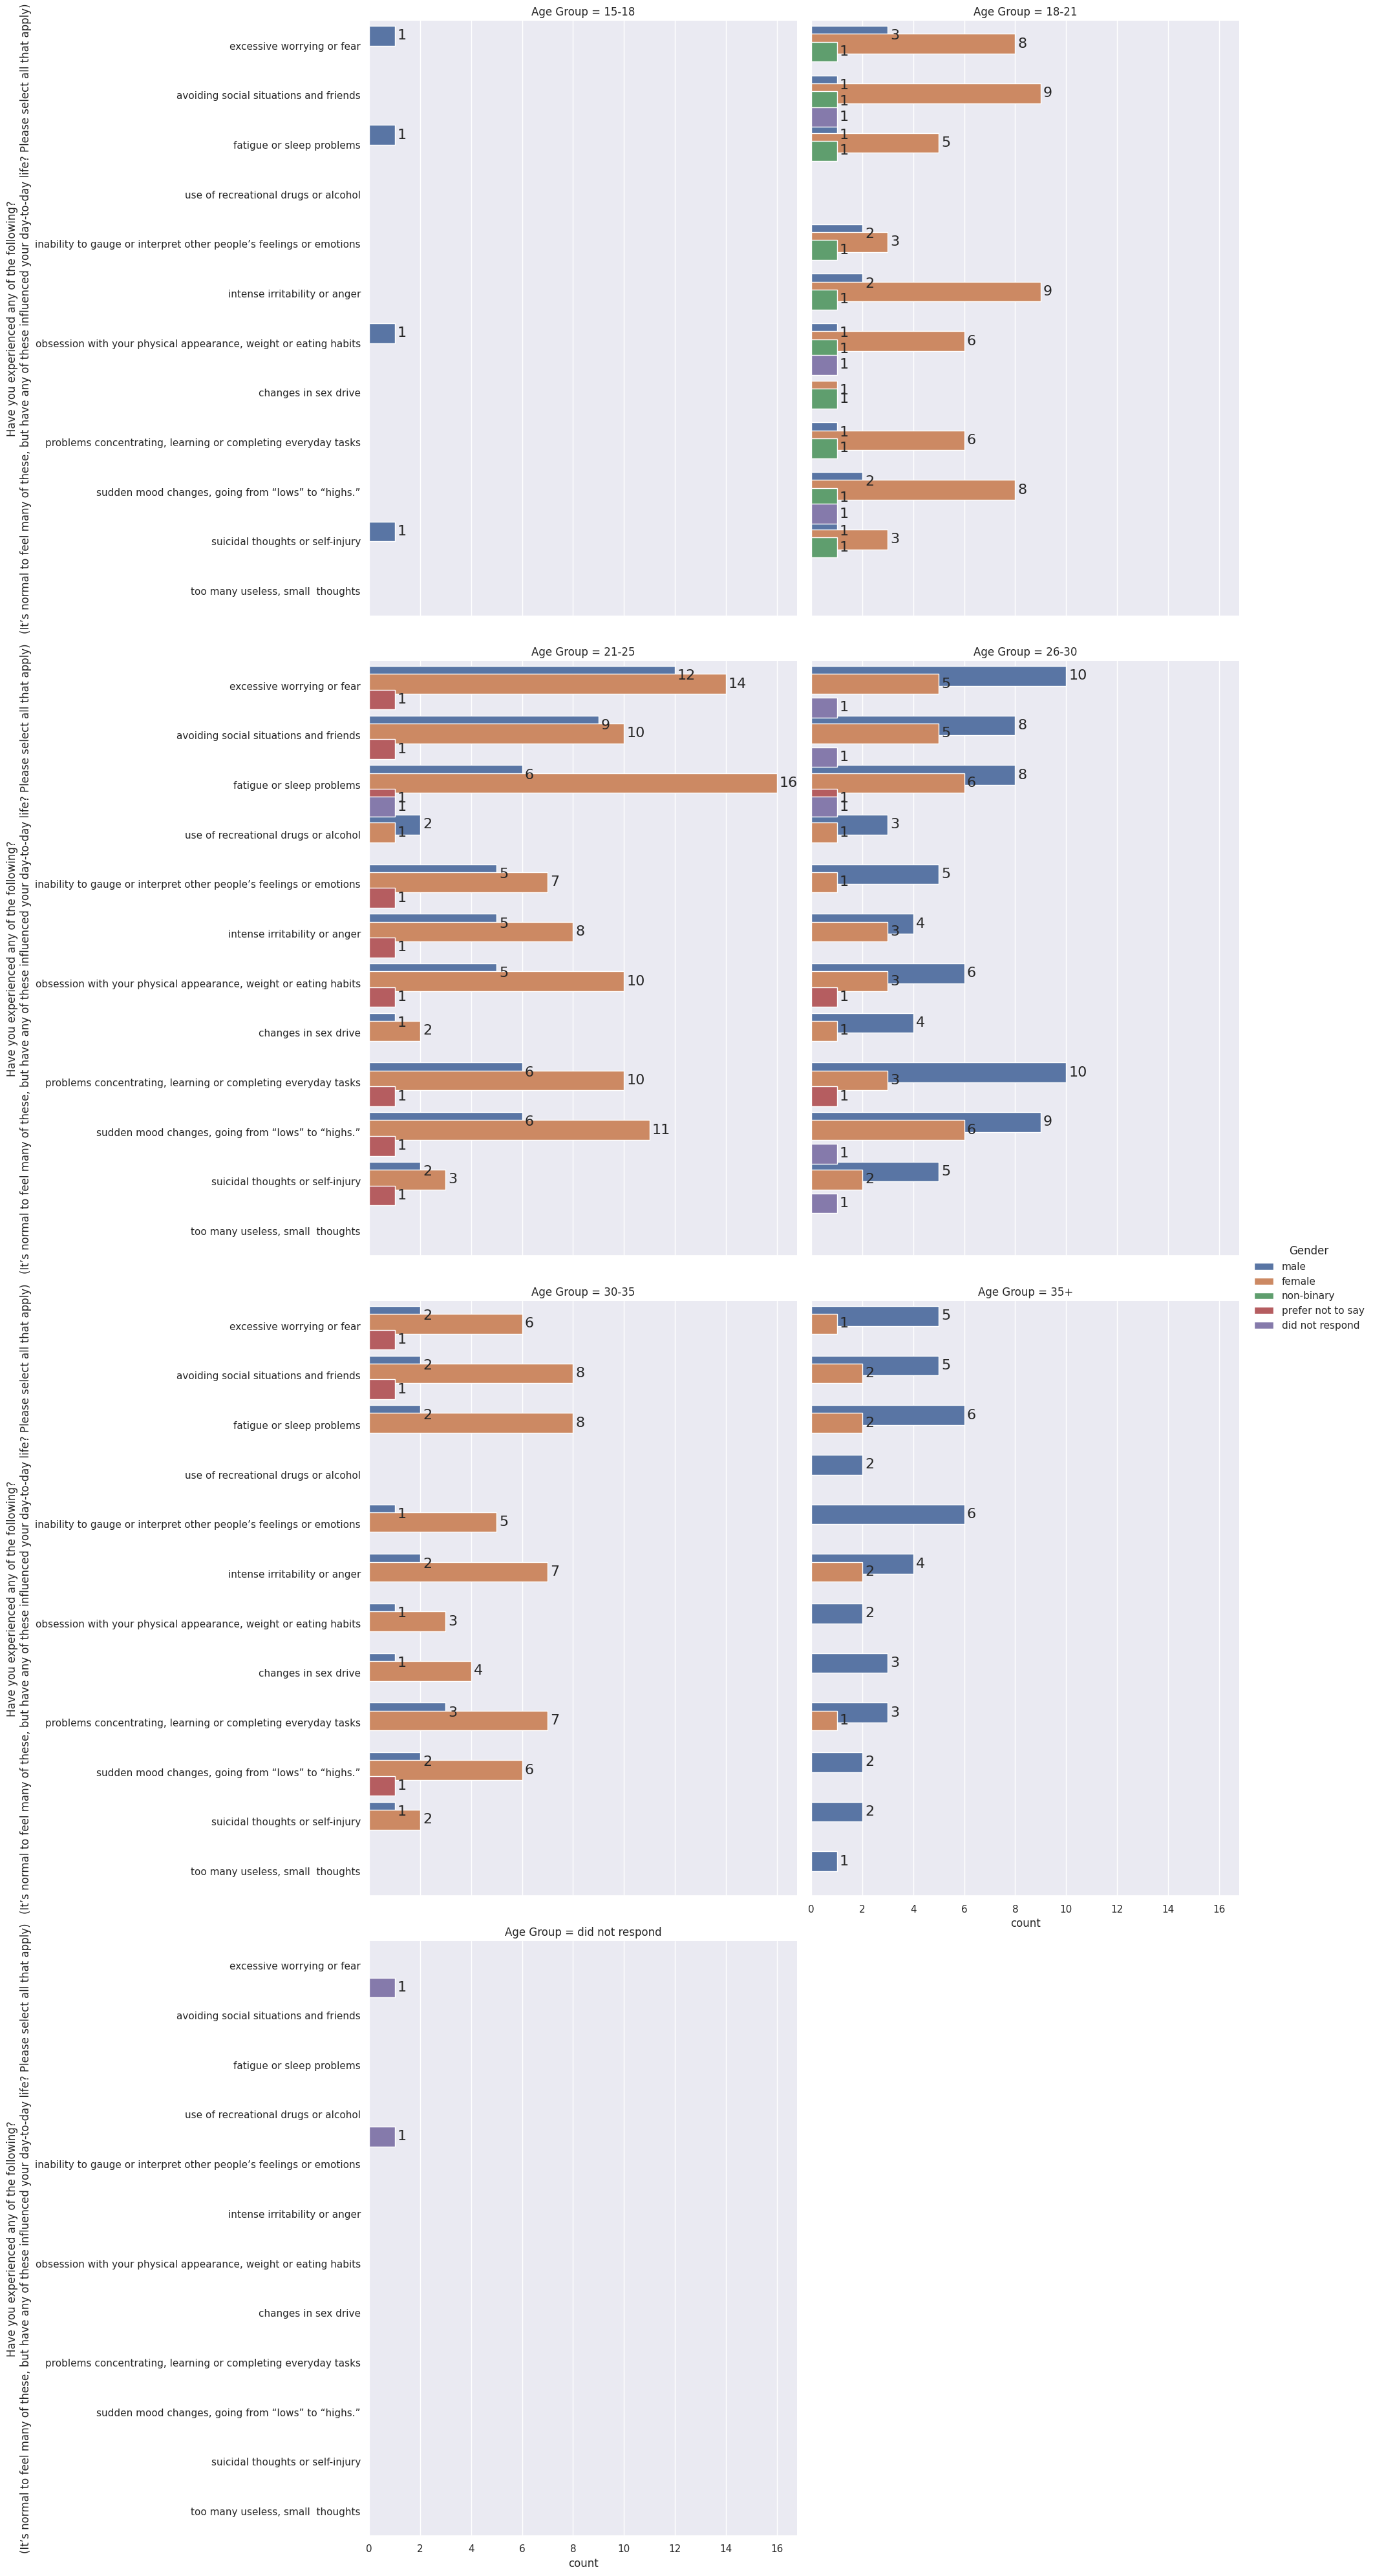

In [64]:
features_list = [
    "excessive worrying or fear",
    "avoiding social situations and friends",
    "fatigue or sleep problems",
    "use of recreational drugs or alcohol",
    "inability to gauge or interpret other people’s feelings or emotions",
    "intense irritability or anger",
    "obsession with your physical appearance, weight or eating habits",
    "changes in sex drive",
    "problems concentrating, learning or completing everyday tasks",
    'sudden mood changes, going from “lows” to “highs.”',
    "suicidal thoughts or self-injury",
    "too many useless, small  thoughts",
]
feature_attribute_name = 'Have you experienced any of the following?\n(It’s normal to feel many of these, but have any of these influenced your day-to-day life? Please select all that apply)'
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
legend_name = 'Gender'
get_cross_attributes_graph_3d(features_list, legend_list, feature_attribute_name, legend_name, 'Age Group')

/tmp/ipykernel_34/1543830258.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/tmp/ipykernel_34/1543830258.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[word] = df[feature_attribute_name].str.contains(word, case=False)


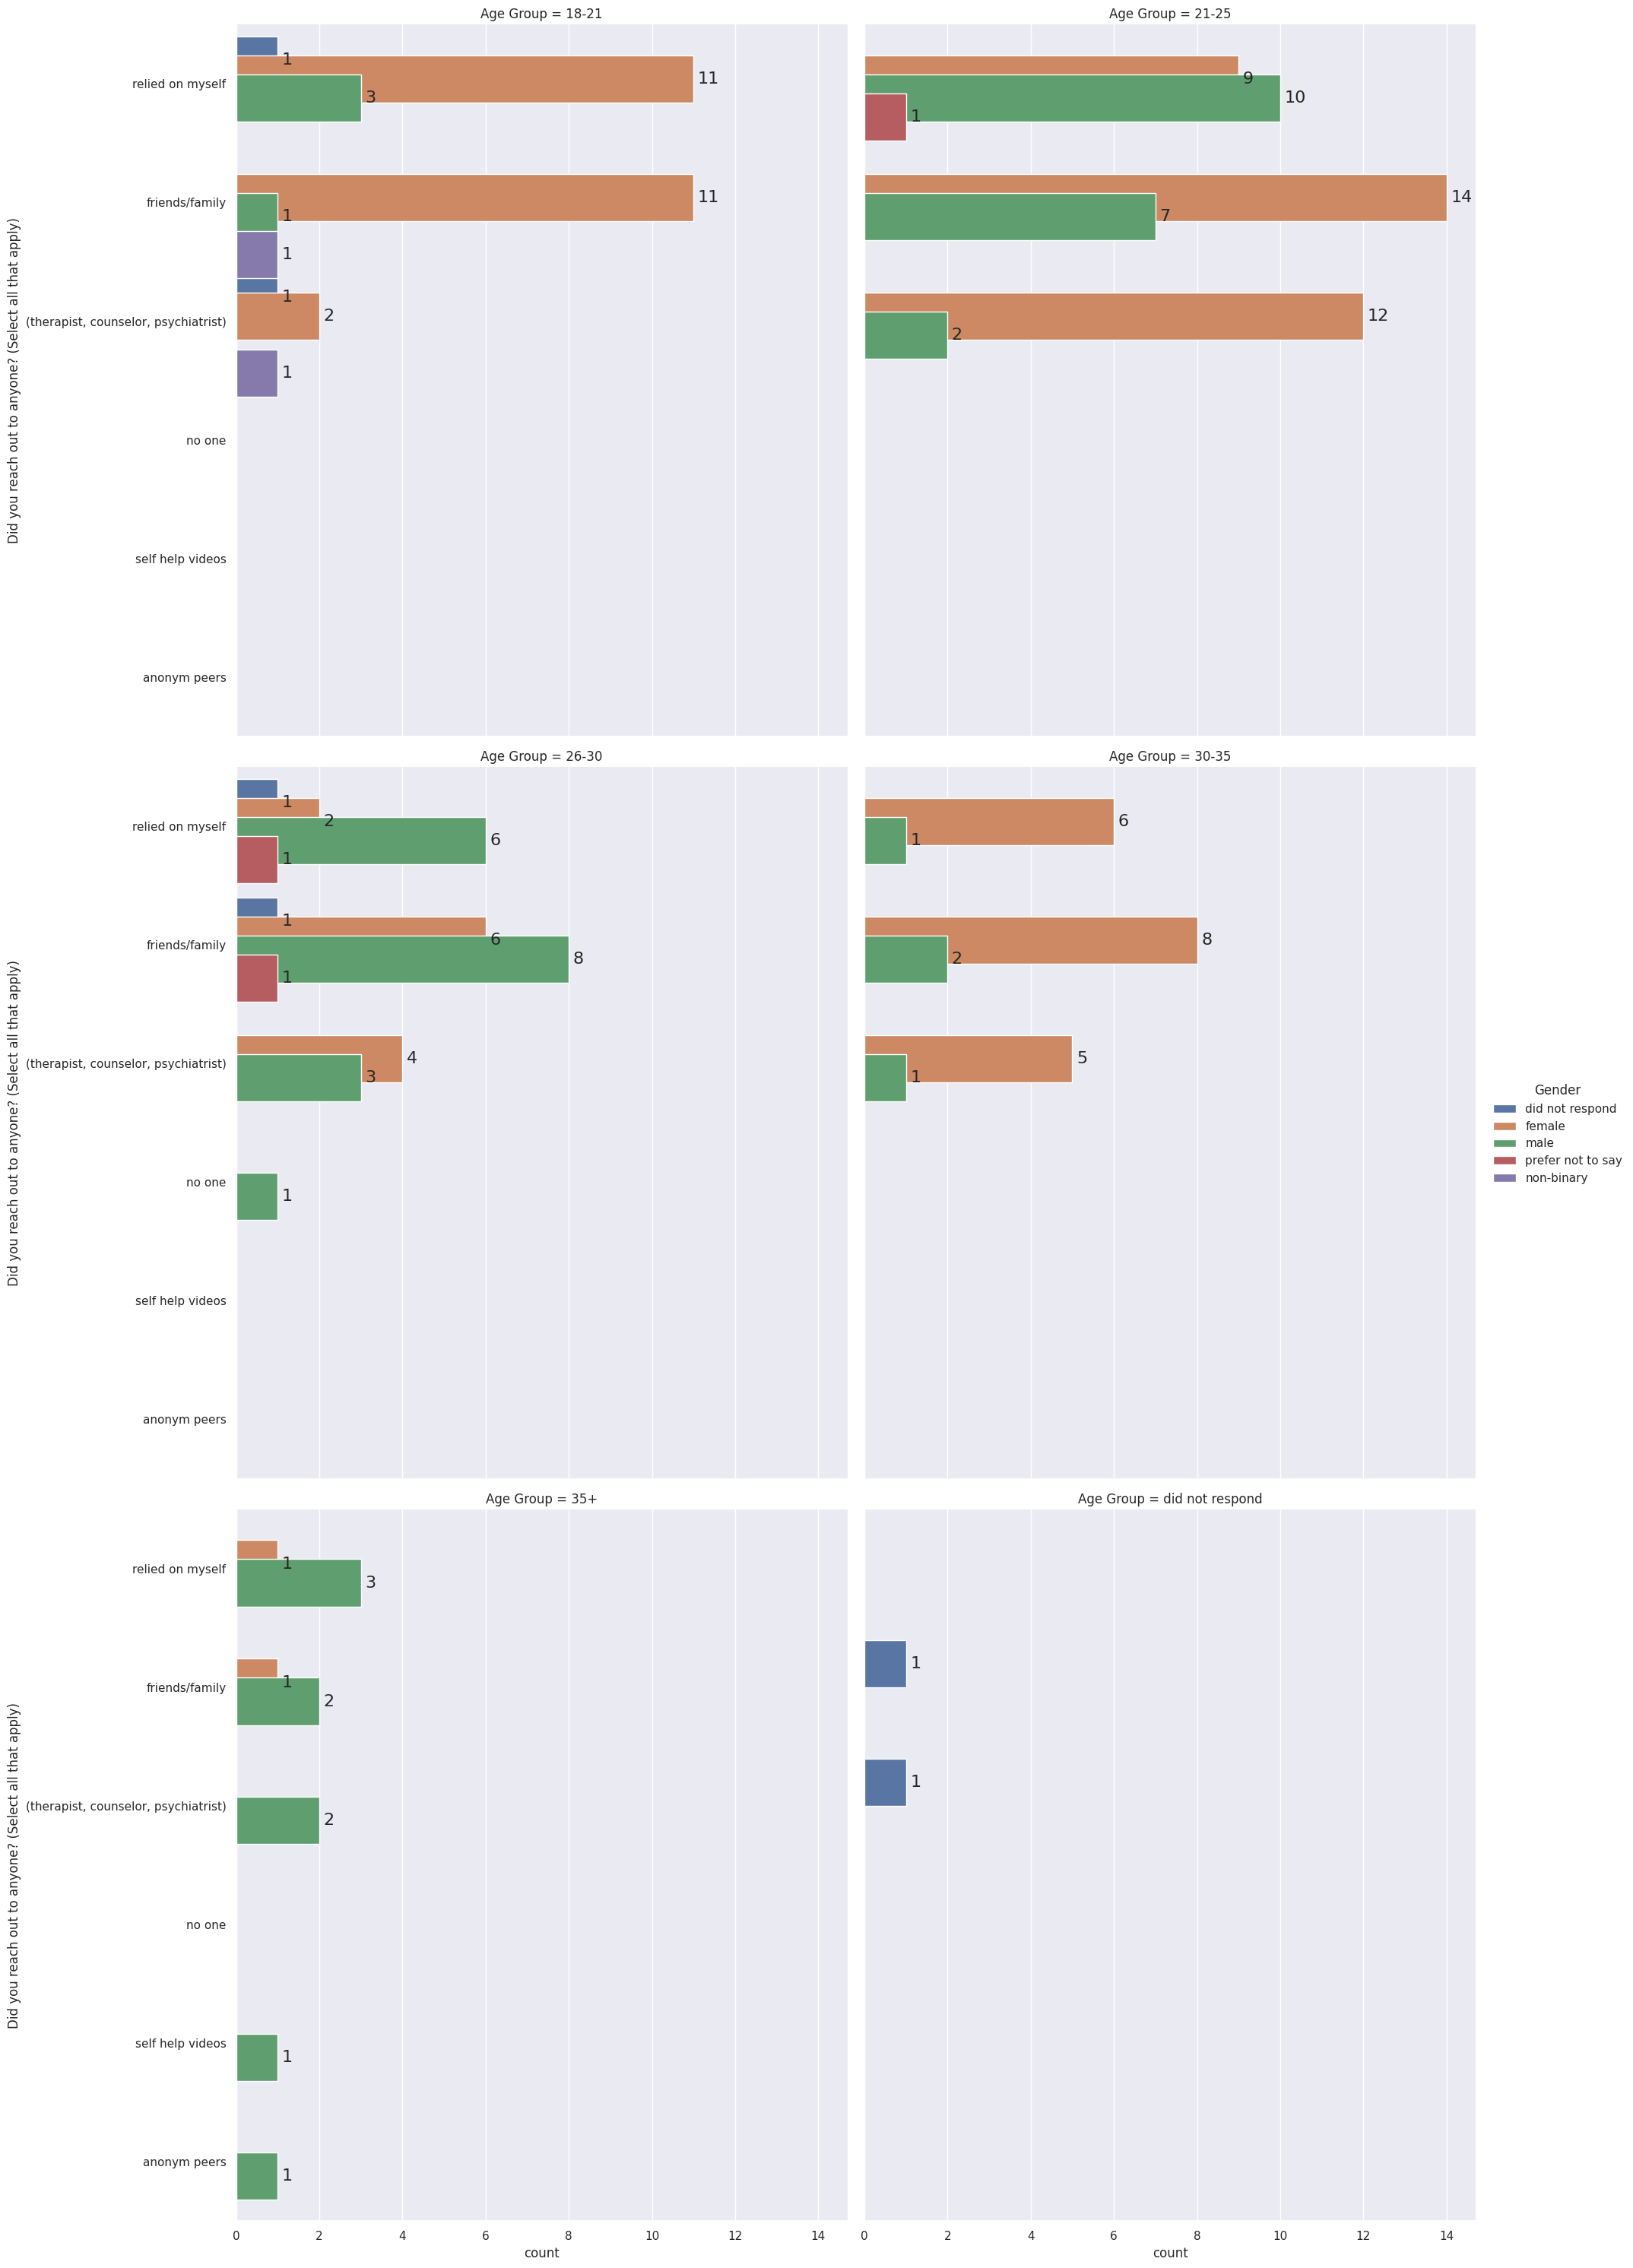

In [65]:
features_list = ['relied on myself', 'friends/family', '(therapist, counselor, psychiatrist)', 'no one', 'self help videos', 'anonym peers']
feature_attribute_name = 'Did you reach out to anyone? (Select all that apply)'
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
legend_name = 'Gender'
get_cross_attributes_graph_3d(features_list, legend_list, feature_attribute_name, legend_name, 'Age Group')

/tmp/ipykernel_34/1543830258.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


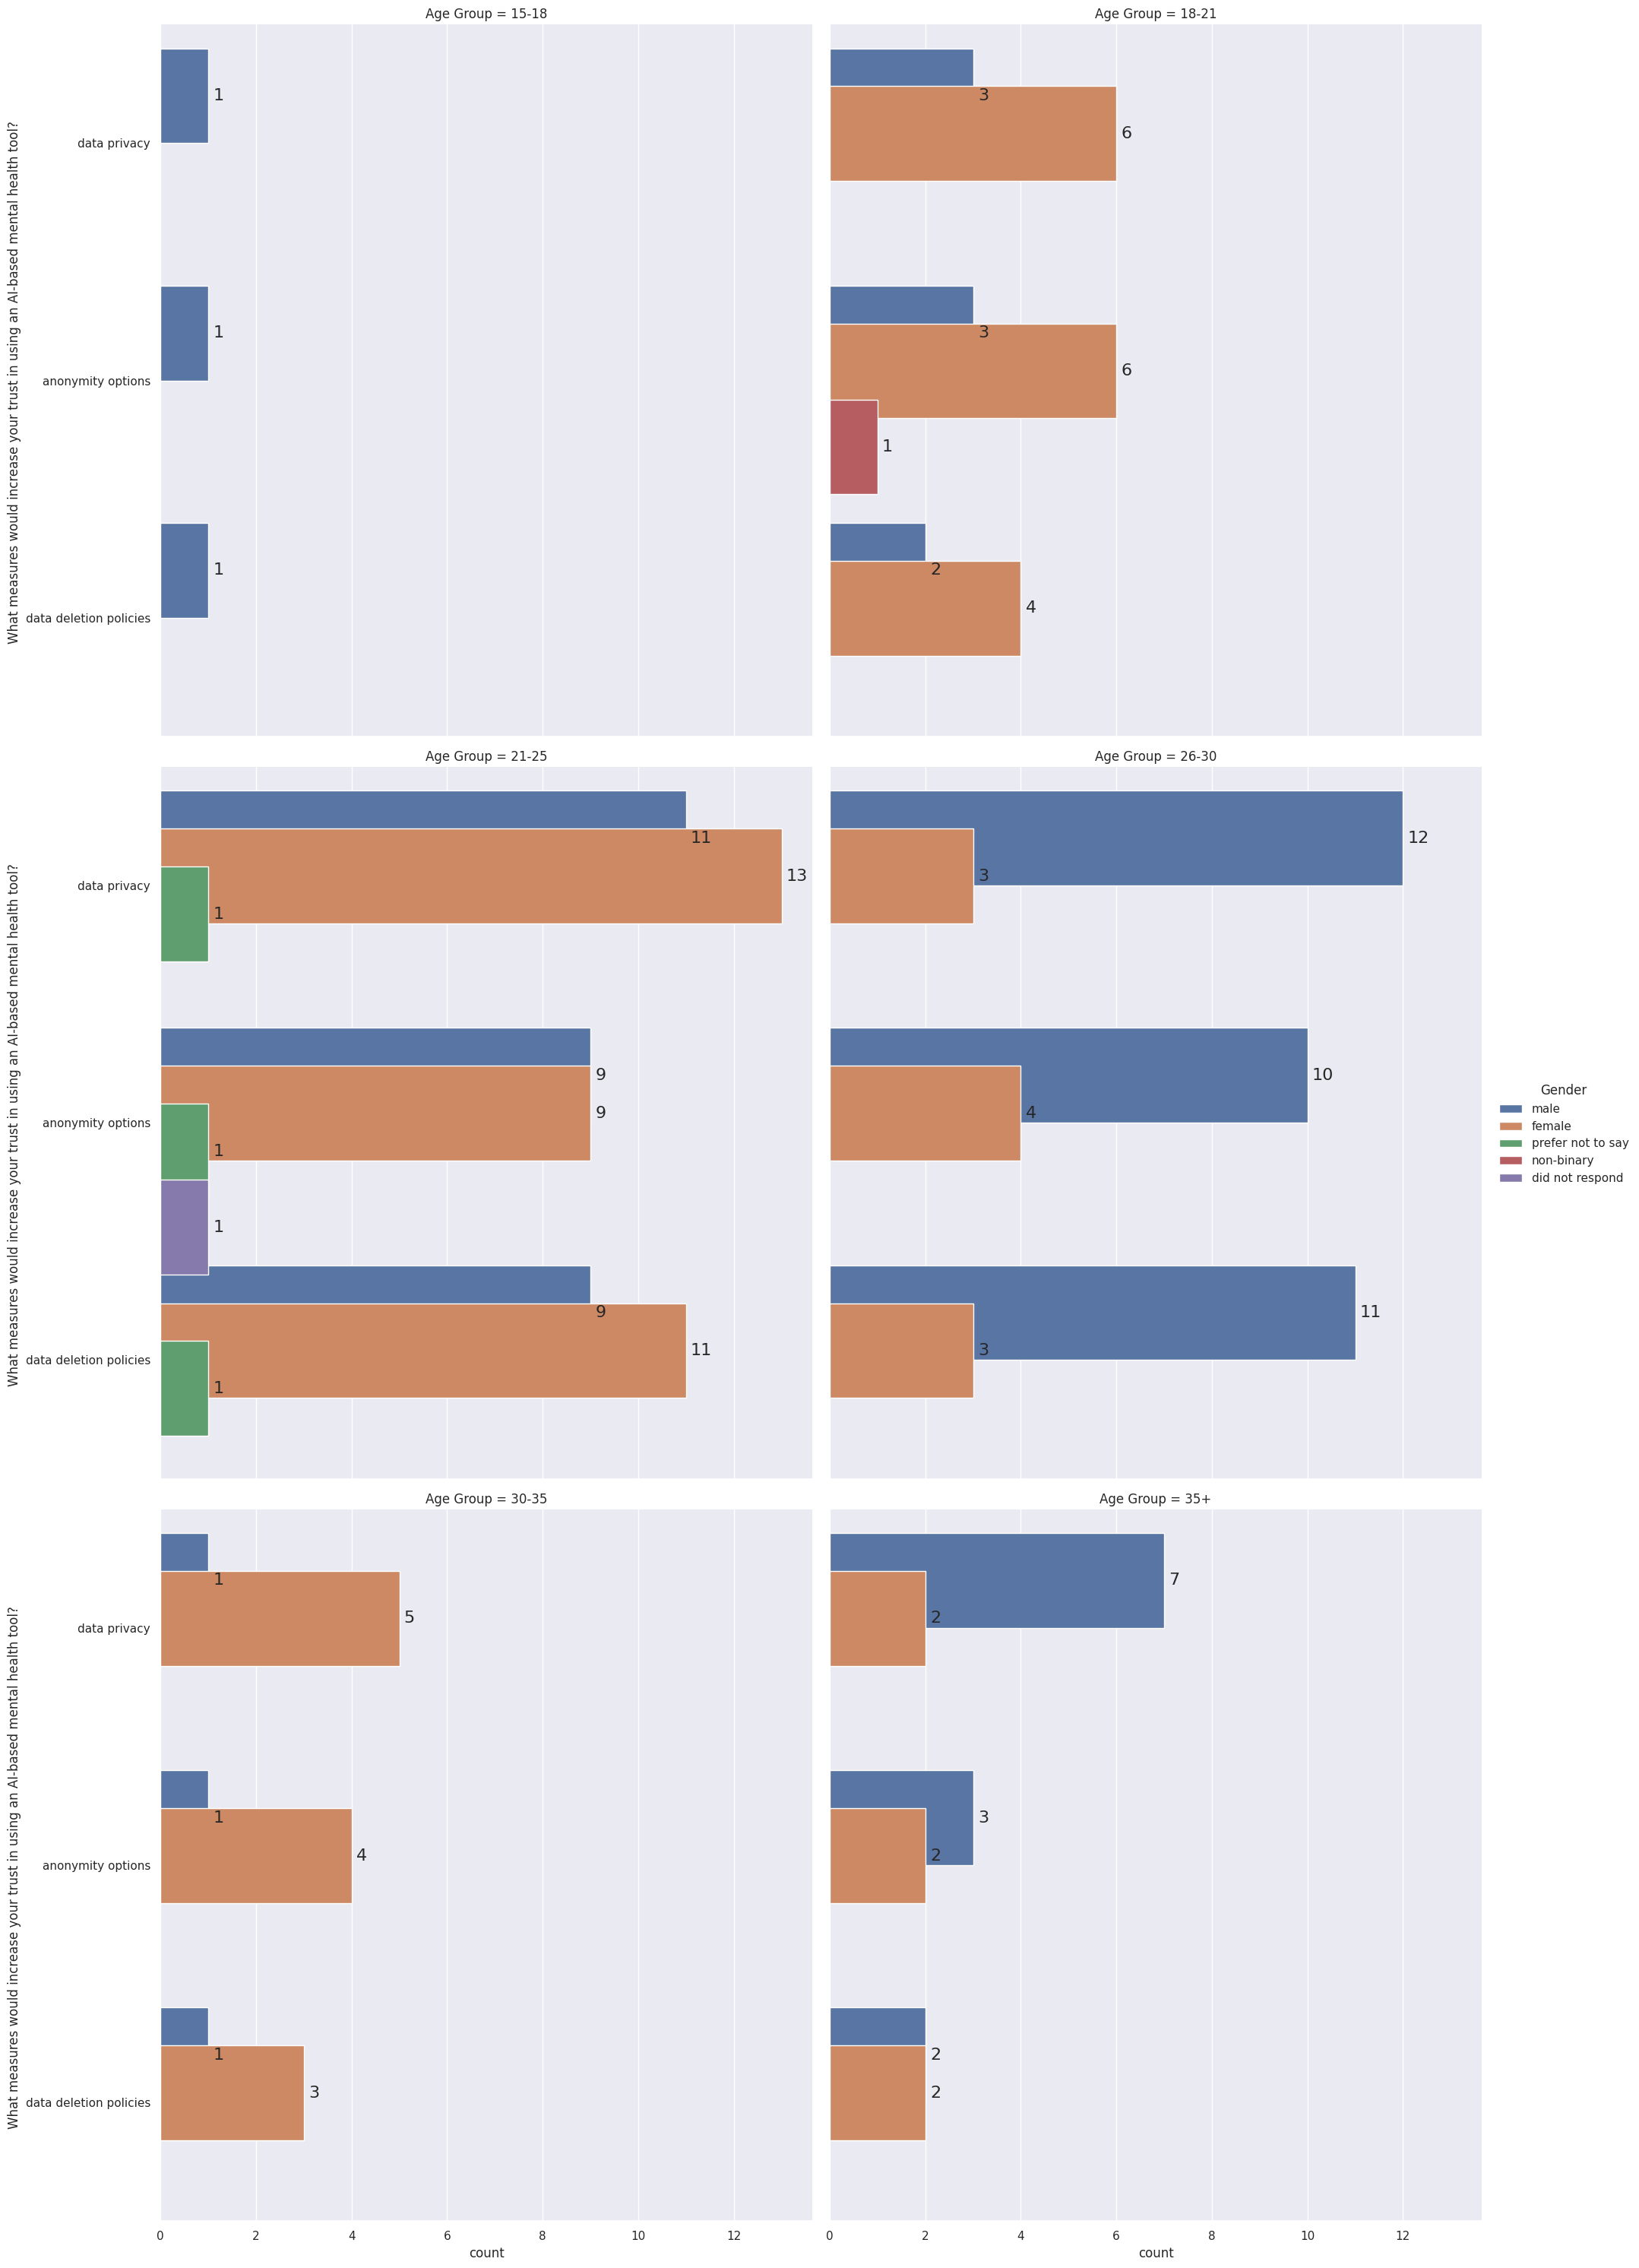

In [66]:
features_list = ['data privacy', 'anonymity options', 'data deletion policies']
feature_attribute_name = 'What measures would increase your trust in using an AI-based mental health tool? '
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
legend_name = 'Gender'
get_cross_attributes_graph_3d(features_list, legend_list, feature_attribute_name, legend_name, 'Age Group')

/tmp/ipykernel_34/1543830258.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/tmp/ipykernel_34/1543830258.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[word] = df[feature_attribute_name].str.contains(word, case=False)
/tmp/ipykernel_34/1543830258.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[word] = df[feature_attribute_name].str.contains(word, case=False)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
/opt/conda/lib/python3.10/site-p

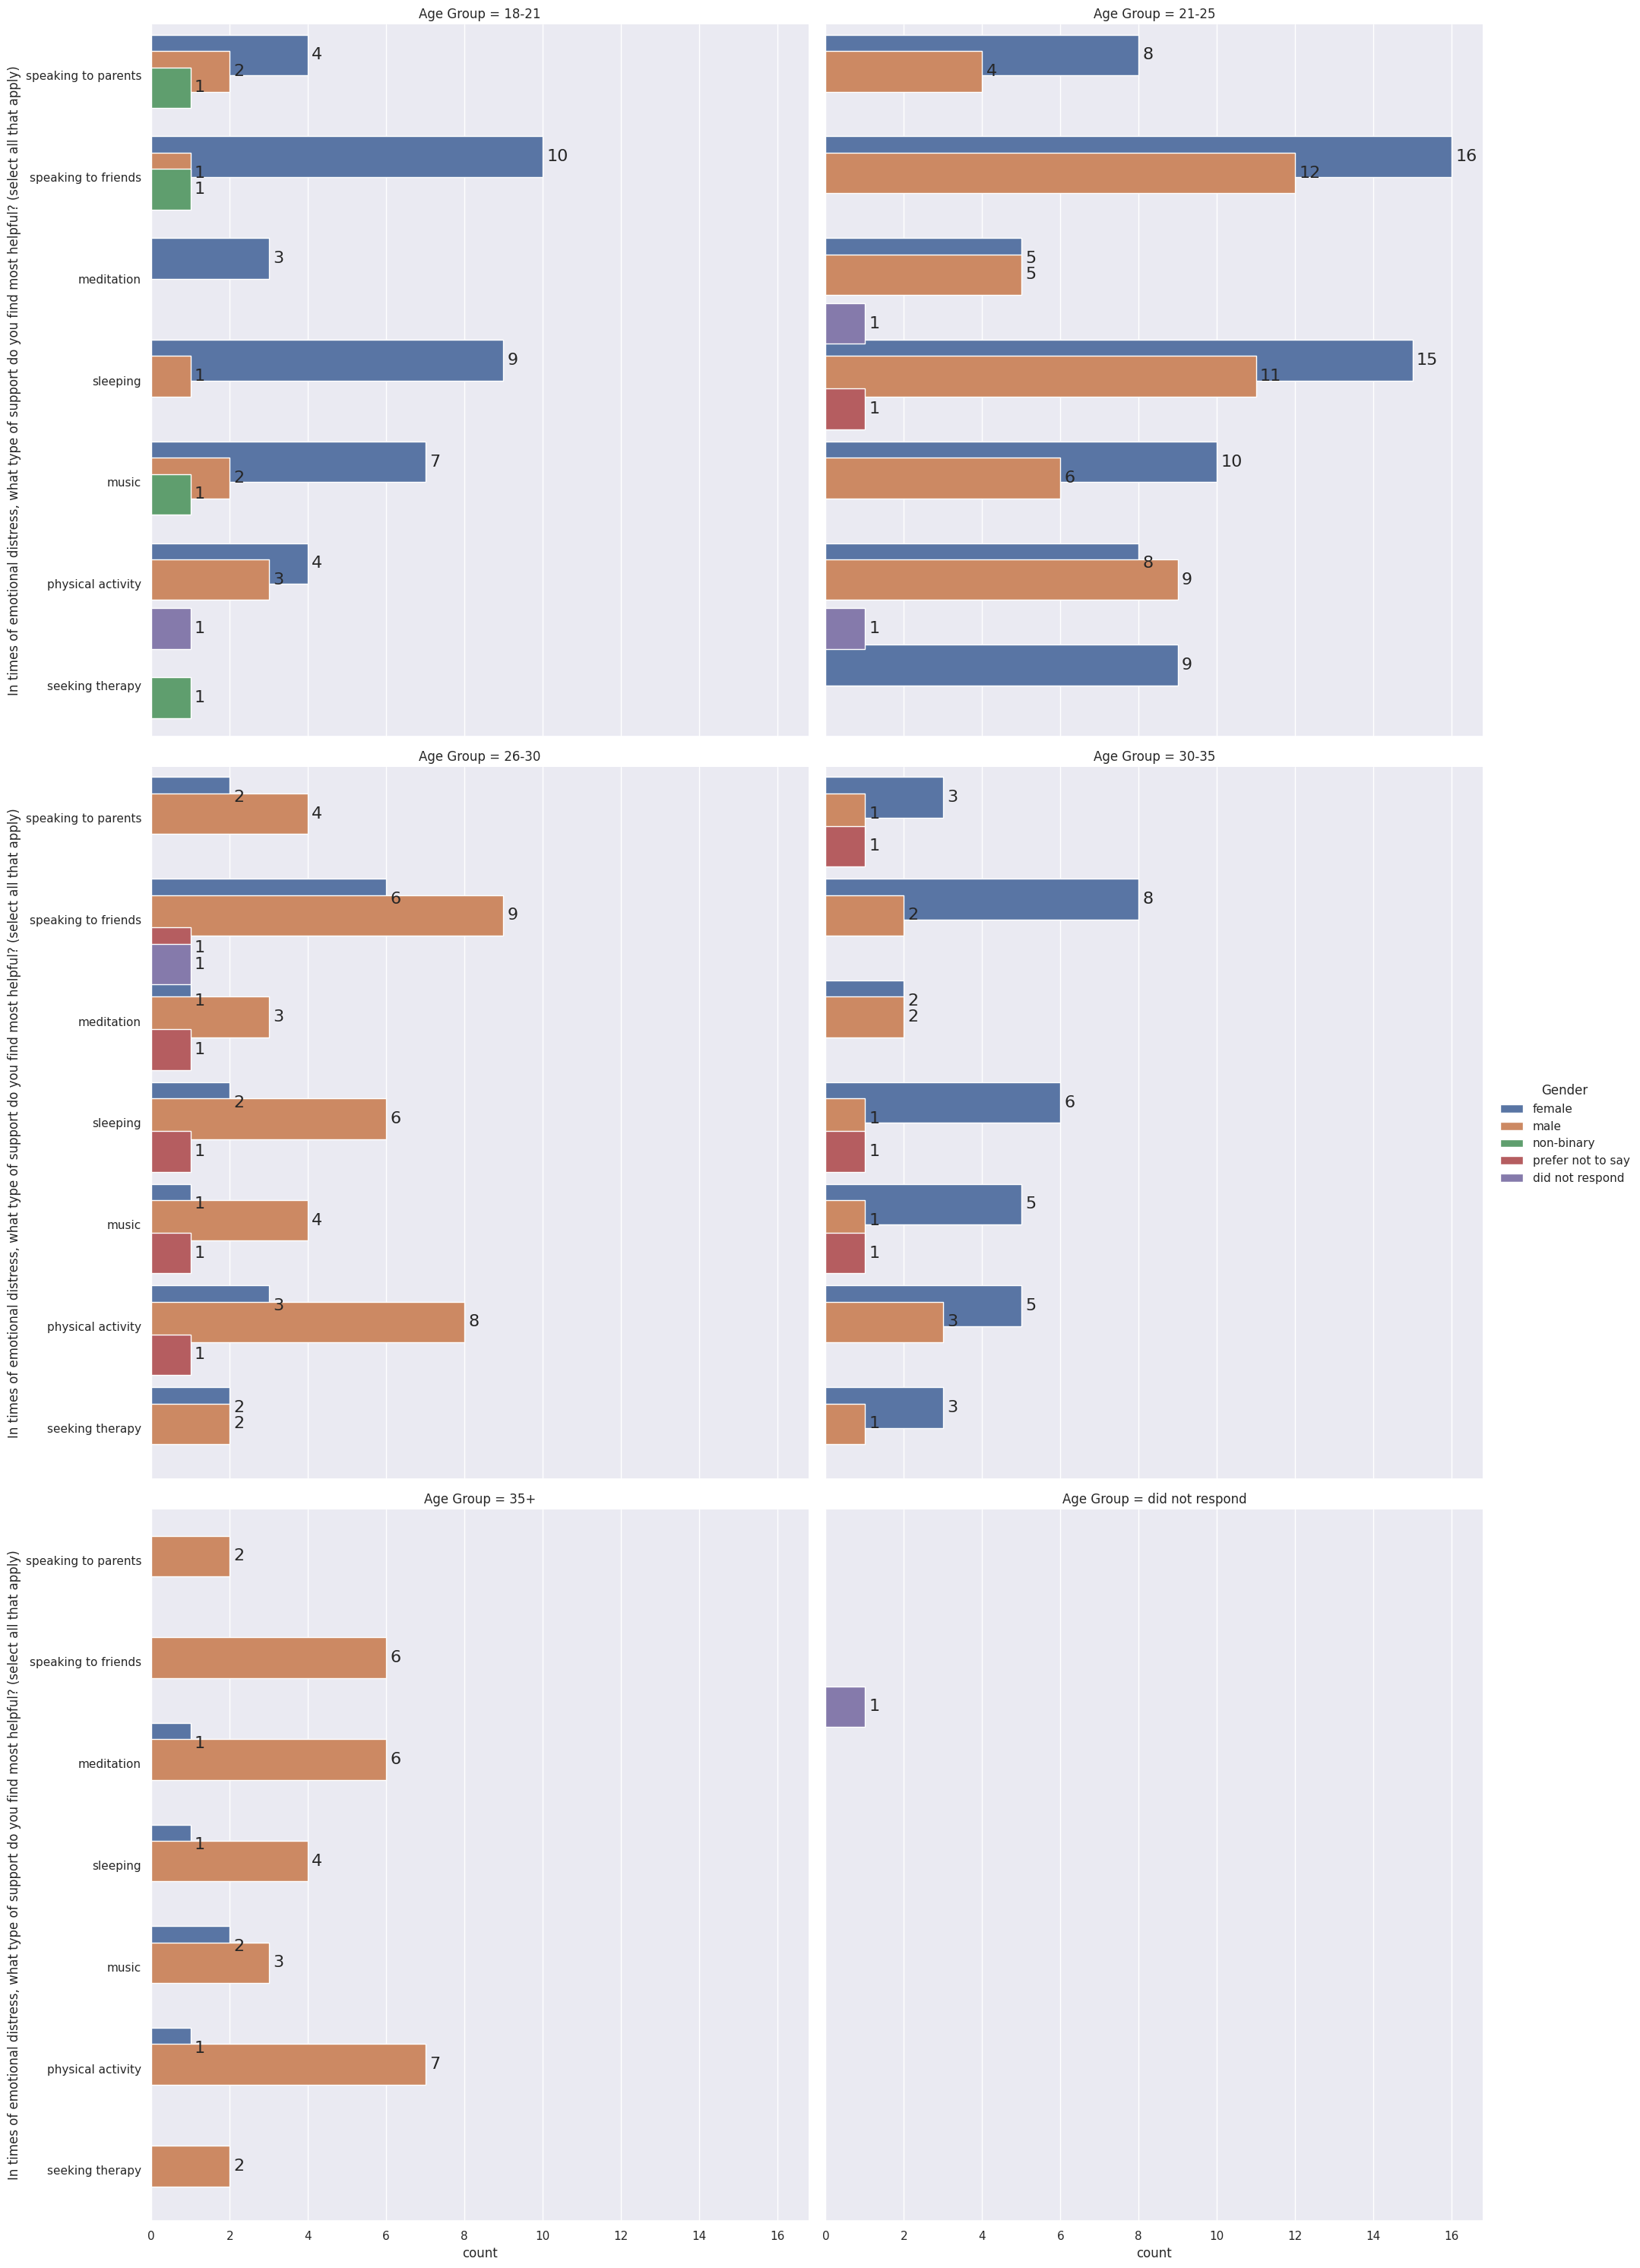

In [67]:
features_list = ['speaking to parents','speaking to friends','meditation','distractions (watching tv, reading)',
                                                                             'sleeping',
                                                                             'music',
                                                                             'physical activity',
                                                                             'seeking therapy',
                                                                             'others (please specify)'
                                                                             ]
feature_attribute_name = 'In times of emotional distress, what type of support do you find most helpful? (select all that apply)'
legend_list = ['male', 'female', 'prefer not to say', 'non-binary']
legend_name = 'Gender'
get_cross_attributes_graph_3d(features_list, legend_list, feature_attribute_name, legend_name, 'Age Group')